In [67]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wntr as wn
import networkx as nx
from collections import defaultdict
import tensorflow as tf
import math

in2_ft2 = 0.0005787

In [68]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [69]:
toplevelpath = "/Users/kavyaub/Documents/mySubjects/ConEdison"
#toplevelpath = "/Users/aya/Documents/code-pfs/gas-nx"

all_datadir = "/NYU_LeakData"

def ask_user_path(pathinput, datadirinput):
    ask_user_path_text = 'FilePath for Data is: ' + pathinput + datadirinput + ' OK? y / n '
    response = 'y'
    user_inputYN = input(ask_user_path_text)
    if user_inputYN.lower() not in response:
        new_input = 'PASTE FULL PATH TO YOUR DATA DIRECTORY HERE: '
        newpath = input(new_input)
        return newpath
    elif user_inputYN in response:
        response2 = pathinput + datadirinput
        return response2

#datadirpath = ask_user_path(toplevelpath, all_datadir)
get_file_datadirpath = ask_user_path(toplevelpath, all_datadir)


FilePath for Data is: /Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData OK? y / n 


In [70]:

anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nodeArr=pd.read_csv(anomalyFreeNode)

anomalyFree = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
def get_file(name):
    anomaly = get_file_datadirpath+name
    nFile=pd.read_csv(anomaly)
    return nFile

In [72]:
def flowDeviation_vel(file0, file1):
    res_arr = file1
    res_arr['VELOpipeFPS']= file1.VELOpipeFPS
    dividend = max(file0['VELOpipeFPS'])
    res_arr.VELOpipeFPS = abs(res_arr.VELOpipeFPS.subtract(file0.VELOpipeFPS))/dividend
    return res_arr

In [73]:
preDir = "/ReducedNodeSet/"
name500="CECnodes_500_TableToExcel"
filetype = ".csv"
nodes500 = get_file(preDir+name500+filetype)

In [74]:
def calculations(input_arr):
    final_temp_arr = np.array([input_arr['NAME'],input_arr['FacilityFromNodeName'],input_arr['FacilityToNodeName'],input_arr['NAME'],[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size])

    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    setOfNames = set(nodeArr['NAME'])

    for i in range(0,final_temp_arr[1].size):
        if final_temp_arr[1][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[1][i]]
            final_temp_arr[4][i]=temp.iloc[0][3]
            final_temp_arr[5][i]=temp.iloc[0][2]
        if final_temp_arr[2][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[2][i]]
            final_temp_arr[6][i]=temp.iloc[0][3]
            final_temp_arr[7][i]=temp.iloc[0][2]
            
    mid_elem_x=(final_temp_arr[4]+final_temp_arr[6])/2.0
    mid_elem_y=(final_temp_arr[5]+final_temp_arr[7])/2.0
    
    final_temp_arr[8]=mid_elem_x
    final_temp_arr[9]=mid_elem_y
    input_arr['mid_point_x']=mid_elem_x
    input_arr['mid_point_y']=mid_elem_y

In [75]:
def reducer(input_arr):
    
    unique_nodes = nodes500.NAME.unique()
    reduced_nodeArr = input_arr[input_arr.FacilityFromNodeName.isin(unique_nodes)]
    reduced_nodeArr1 = input_arr[input_arr.FacilityToNodeName.isin(unique_nodes)]

    reduced_nodeArr.reset_index(inplace = True, drop = True)
    reduced_nodeArr1.reset_index(inplace = True, drop = True)
    reduced_nodeArr1.shape

    df=pd.merge(reduced_nodeArr,reduced_nodeArr1)
    df_new=df.drop_duplicates()
    return df_new
    

In [76]:
preDir = "/LeakData_ZeroDegrees/"
name0_11="NYU Anamoly Data_ZeroDeg_Pipes_Leak11"
name0_21="NYU Anamoly Data_ZeroDeg_Pipes_Leak21"
name0_31="NYU Anamoly Data_ZeroDeg_Pipes_Leak31"
name0_41="NYU Anamoly Data_ZeroDeg_Pipes_Leak41"
filetype = ".csv"

leak0_11 = get_file(preDir+name0_11+filetype)
leak0_21 = get_file(preDir+name0_21+filetype)
leak0_31 = get_file(preDir+name0_31+filetype)
leak0_41 = get_file(preDir+name0_41+filetype)

In [77]:
preDir = "/LeakData_16Degrees/"
name1="NYU Anamoly Data_16Deg_Pipes_Leak1.csv"
name11="NYU Anamoly Data_16Deg_Pipes_Leak11.csv"
name21="NYU Anamoly Data_16Deg_Pipes_Leak21.csv"
name31="NYU Anamoly Data_16Deg_Pipes_Leak31.csv"
name41="NYU Anamoly Data_16Deg_Pipes_Leak41.csv"

leak1=get_file(preDir+name1)
leak11 = get_file(preDir+name11)
leak21 = get_file(preDir+name21)
leak31 = get_file(preDir+name31)
leak41 = get_file(preDir+name41)

In [78]:
preDir = "/LeakData_32Degrees/"
leakFree32 = "NYU Anamoly Data_32Deg_Nodes.csv"
name32_01="NYU Anamoly Data_32Deg_Pipes_Leak1.csv"
name32_11="NYU Anamoly Data_32Deg_Pipes_Leak11.csv"
name32_21="NYU Anamoly Data_32Deg_Pipes_Leak21.csv"
name32_31="NYU Anamoly Data_32Deg_Pipes_Leak31.csv"
name32_41="NYU Anamoly Data_32Deg_Pipes_Leak41.csv"

leak32_00 = get_file(preDir+leakFree32)
leak32_01 = get_file(preDir+name32_01)
leak32_11 = get_file(preDir+name32_11)
leak32_21 = get_file(preDir+name32_21)
leak32_31 = get_file(preDir+name32_31)
leak32_41 = get_file(preDir+name32_41)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [79]:
preDir = "/LeakData_48Degrees/"
leakFree48 = "NYU Anamoly Data_48Deg_Nodes.csv"
name48_01="NYU Anamoly Data_48Deg_Pipes_Leak1.csv"
name48_11="NYU Anamoly Data_48Deg_Pipes_Leak11.csv"
name48_21="NYU Anamoly Data_48Deg_Pipes_Leak21.csv"
name48_31="NYU Anamoly Data_48Deg_Pipes_Leak31.csv"
name48_41="NYU Anamoly Data_48Deg_Pipes_Leak41.csv"

leak48_00 = get_file(preDir+leakFree48)
leak48_01 = get_file(preDir+name48_01)
leak48_11 = get_file(preDir+name48_11)
leak48_21 = get_file(preDir+name48_21)
leak48_31 = get_file(preDir+name48_31)
leak48_41 = get_file(preDir+name48_41)


In [80]:
preDir = "/LeakData_64Degrees/"
leakFree48 = "NYU Anamoly Data_64Deg_Nodes.csv"
name64_01="NYU Anamoly Data_64Deg_Pipes_Leak1.csv"
name64_11="NYU Anamoly Data_64Deg_Pipes_Leak11.csv"
name64_21="NYU Anamoly Data_64Deg_Pipes_Leak21.csv"
name64_31="NYU Anamoly Data_64Deg_Pipes_Leak31.csv"
name64_41="NYU Anamoly Data_64Deg_Pipes_Leak41.csv"

leak64_00 = get_file(preDir+leakFree48)
leak64_01 = get_file(preDir+name64_01)
leak64_11 = get_file(preDir+name64_11)
leak64_21 = get_file(preDir+name64_21)
leak64_31 = get_file(preDir+name64_31)
leak64_41 = get_file(preDir+name64_41)


In [81]:

setOfNames = set(leak0_41['NAME'])
def pipe_velocity_calc(pipedf):
    final_pipedf = np.array([pipedf['NAME'],pipedf['FacilityFromNodeName'],pipedf['FacilityToNodeName'],pipedf['FacilityFlowAbsolute'],pipedf['PipeDiameter'],[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size])

    for i in range(0,final_pipedf[1].size):
        if final_pipedf[0][i] in setOfNames:
            temp = pipedf.loc[pipedf['NAME']==final_pipedf[0][i]]
            final_pipedf[5][i]=temp.iloc[0][90]
            final_pipedf[6][i]=temp.iloc[0][94]

    ## Creating the Velocity Rate Column ##
    elem_AREApipeFT2 = (final_pipedf[6]**2/4*math.pi*in2_ft2)
    elem_VELOpipeFPS = (final_pipedf[5]/elem_AREApipeFT2*1000/3600)
    final_pipedf[8] = elem_AREApipeFT2
    final_pipedf[9] = elem_VELOpipeFPS
    pipedf['AREApipeFT2'] = elem_AREApipeFT2
    pipedf['VELOpipeFPS'] = elem_VELOpipeFPS

    return pipedf

In [82]:
res0_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff0_1 = flowDeviation_vel(normal_vel_1,res0_1)
calculations(cal_diff0_1)

res0_11 = pipe_velocity_calc(leak0_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff0_11 = flowDeviation_vel(normal_vel_11,res0_11)
calculations(cal_diff0_11)

res0_21 = pipe_velocity_calc(leak0_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff0_21 = flowDeviation_vel(normal_vel_21,res0_21)
calculations(cal_diff0_21)

res0_31 = pipe_velocity_calc(leak0_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff0_31 = flowDeviation_vel(normal_vel_31,res0_31)
calculations(cal_diff0_31)

res0_41 = pipe_velocity_calc(leak0_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff0_41 = flowDeviation_vel(normal_vel_41,res0_41)
calculations(cal_diff0_41)

cal_diff0_1 = cal_diff0_1.fillna(value=0.0)
cal_diff0_11 = cal_diff0_11.fillna(value=0.0)
cal_diff0_21 = cal_diff0_21.fillna(value=0.0)
cal_diff0_31 = cal_diff0_31.fillna(value=0.0)
cal_diff0_41 = cal_diff0_41.fillna(value=0.0)

cal_diff0_1_500=reducer(cal_diff0_1)
cal_diff0_11_500=reducer(cal_diff0_11)
cal_diff0_21_500=reducer(cal_diff0_21)
cal_diff0_31_500=reducer(cal_diff0_31)
cal_diff0_41_500=reducer(cal_diff0_41)

In [83]:
max(res0_41.VELOpipeFPS)

0.12183194876781431

In [84]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff1 = flowDeviation_vel(normal_vel_1,res1)
calculations(cal_diff1)

res11 = pipe_velocity_calc(leak11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff11 = flowDeviation_vel(normal_vel_11,res11)
calculations(cal_diff11)

res21 = pipe_velocity_calc(leak21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff21 = flowDeviation_vel(normal_vel_21,res21)
calculations(cal_diff21)

res31 = pipe_velocity_calc(leak31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff31 = flowDeviation_vel(normal_vel_31,res31)
calculations(cal_diff31)

res41 = pipe_velocity_calc(leak41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff41 = flowDeviation_vel(normal_vel_41,res41)
calculations(cal_diff41)

cal_diff1 = cal_diff1.fillna(value=0.0)
cal_diff11 = cal_diff11.fillna(value=0.0)
cal_diff21 = cal_diff21.fillna(value=0.0)
cal_diff31 = cal_diff31.fillna(value=0.0)
cal_diff41 = cal_diff41.fillna(value=0.0)


cal_diff1_500=reducer(cal_diff1)
cal_diff11_500=reducer(cal_diff11)
cal_diff21_500=reducer(cal_diff21)
cal_diff31_500=reducer(cal_diff31)
cal_diff41_500=reducer(cal_diff41)

In [85]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_32Degrees/NYU Anamoly Data_32Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_32Degrees/NYU Anamoly Data_32Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res32_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff32_1 = flowDeviation_vel(normal_vel_1,res32_1)
calculations(cal_diff32_1)

res32_11 = pipe_velocity_calc(leak32_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff32_11 = flowDeviation_vel(normal_vel_11,res32_11)
calculations(cal_diff32_11)

res32_21 = pipe_velocity_calc(leak32_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff32_21 = flowDeviation_vel(normal_vel_21,res32_21)
calculations(cal_diff32_21)

res32_31 = pipe_velocity_calc(leak32_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff32_31 = flowDeviation_vel(normal_vel_31,res32_31)
calculations(cal_diff32_31)

res32_41 = pipe_velocity_calc(leak32_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff32_41 = flowDeviation_vel(normal_vel_41,res32_41)
calculations(cal_diff32_41)

cal_diff32_1 = cal_diff32_1.fillna(value=0.0)
cal_diff32_11 = cal_diff32_11.fillna(value=0.0)
cal_diff32_21 = cal_diff32_21.fillna(value=0.0)
cal_diff32_31 = cal_diff32_31.fillna(value=0.0)
cal_diff32_41 = cal_diff32_41.fillna(value=0.0)

cal_diff32_1_500=reducer(cal_diff32_1)
cal_diff32_11_500=reducer(cal_diff32_11)
cal_diff32_21_500=reducer(cal_diff32_21)
cal_diff32_31_500=reducer(cal_diff32_31)
cal_diff32_41_500=reducer(cal_diff32_41)

In [86]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_48Degrees/NYU Anamoly Data_48Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_48Degrees/NYU Anamoly Data_48Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res48_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff48_1 = flowDeviation_vel(normal_vel_1,res48_1)
calculations(cal_diff48_1)

res48_11 = pipe_velocity_calc(leak48_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff48_11 = flowDeviation_vel(normal_vel_11,res48_11)
calculations(cal_diff48_11)

res48_21 = pipe_velocity_calc(leak48_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff48_21 = flowDeviation_vel(normal_vel_21,res48_21)
calculations(cal_diff48_21)

res48_31 = pipe_velocity_calc(leak48_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff48_31 = flowDeviation_vel(normal_vel_31,res48_31)
calculations(cal_diff48_31)

res48_41 = pipe_velocity_calc(leak48_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff48_41 = flowDeviation_vel(normal_vel_41,res48_41)
calculations(cal_diff48_41)

cal_diff48_1 = cal_diff48_1.fillna(value=0.0)
cal_diff48_11 = cal_diff48_11.fillna(value=0.0)
cal_diff48_21 = cal_diff48_21.fillna(value=0.0)
cal_diff48_31 = cal_diff48_31.fillna(value=0.0)
cal_diff48_41 = cal_diff48_41.fillna(value=0.0)

cal_diff48_1_500=reducer(cal_diff48_1)
cal_diff48_11_500=reducer(cal_diff48_11)
cal_diff48_21_500=reducer(cal_diff48_21)
cal_diff48_31_500=reducer(cal_diff48_31)
cal_diff48_41_500=reducer(cal_diff48_41)

In [87]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_64Degrees/NYU Anamoly Data_64Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_64Degrees/NYU Anamoly Data_64Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res64_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff64_1 = flowDeviation_vel(normal_vel_1,res64_1)
calculations(cal_diff64_1)

res64_11 = pipe_velocity_calc(leak64_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff64_11 = flowDeviation_vel(normal_vel_11,res64_11)
calculations(cal_diff64_11)

res64_21 = pipe_velocity_calc(leak64_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff64_21 = flowDeviation_vel(normal_vel_21,res64_21)
calculations(cal_diff64_21)

res64_31 = pipe_velocity_calc(leak64_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff64_31 = flowDeviation_vel(normal_vel_31,res64_31)
calculations(cal_diff64_31)

res64_41 = pipe_velocity_calc(leak64_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff64_41 = flowDeviation_vel(normal_vel_41,res64_41)
calculations(cal_diff64_41)

cal_diff64_1 = cal_diff64_1.fillna(value=0.0)
cal_diff64_11 = cal_diff64_11.fillna(value=0.0)
cal_diff64_21 = cal_diff64_21.fillna(value=0.0)
cal_diff64_31 = cal_diff64_31.fillna(value=0.0)
cal_diff64_41 = cal_diff64_41.fillna(value=0.0)

cal_diff64_1_500=reducer(cal_diff64_1)
cal_diff64_11_500=reducer(cal_diff64_11)
cal_diff64_21_500=reducer(cal_diff64_21)
cal_diff64_31_500=reducer(cal_diff64_31)
cal_diff64_41_500=reducer(cal_diff64_41)

In [88]:
#def hightlightColor(r):
#    if r['sumLeaks']>3:
#        return ['background-color: red']*6
#    elif r['sumLeaks']>2:
#        return ['background-color: orange']*6
#    elif r['sumLeaks']>1:
#        return ['background-color: yellow']*6
#    elif r['sumLeaks']>0:
#        return ['background-color: green']*6
#    else:
#        return ['background-color: blue']*6

In [89]:
#leakTable.style.apply(hightlightColor, axis=1)

In [90]:
anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"

nodeArr=pd.read_csv(anomalyFreeNode)

#dirpltpath = "/Users/aya/Documents/code-pfs/gas-nx/plots/04012020--finalVel"
dirpltpath = "/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg"

In [91]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3d(graphArr):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME



    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','']])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.VELOpipeFPS)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.VELOpipeFPS)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(keys_all)

    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['flow'] = 0
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        name = i[0]
        G.add_edge(psource, pdest, n = name)


    def network_plot_3D(G, angle, save=True):
    
        lower = min(cal_diff0_41['VELOpipeFPS'])
        upper = max(cal_diff0_41['VELOpipeFPS'])
        tp_arr = (graphArr['VELOpipeFPS']-lower)/(upper-lower)
        tp2 = [float(i) for i in tp_arr]
        
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Flow Deviation', fontsize=30)
            ax.set_zlim(lower,upper)
            
            ctr=0
            for key, value in midpos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                p = ax.scatter(xi, yi, zi, c=cc[ctr], alpha=0.7, s=80,cmap=cmap)
                ctr=ctr+1
            d3pos_dict0.update(midpos_dict0)

        
            for i in edges:
                x = np.array((d3pos_dict0[i[0]][0][0],d3pos_dict0[i[1]][0][0] ))
                y = np.array((d3pos_dict0[i[0]][0][1], d3pos_dict0[i[1]][0][1]))
                z = np.array((d3pos_dict0[i[0]][1], d3pos_dict0[i[1]][1]))

                ax.plot(x, y, z, c='gray',alpha=0.5)
            #fig.colorbar(p)


        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        

        if save is not False:
            plt.savefig(d3plotname)
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [92]:
def draw_2d_flow(graphArr):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.VELOpipeFPS)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.VELOpipeFPS)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = min(cal_diff0_41.VELOpipeFPS)
    upper = max(cal_diff0_41.VELOpipeFPS)
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['VELOpipeFPS'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(d2plotname)
    plt.show()

In [93]:
simple_calc = pipe_velocity_calc(leak0_41)
print(max(simple_calc['VELOpipeFPS']))

1636.2226718578963


In [94]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [95]:
scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]


In [96]:
scaled_vals=np.array([cal_diff0_1_500.VELOpipeFPS ,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS, cal_diff0_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41_500=cal_diff0_41_500
color_indexed0_41_500['color']=colors_array[4]
color_indexed0_31_500=cal_diff0_31_500
color_indexed0_31_500['color']=colors_array[3]
color_indexed0_21_500=cal_diff0_21_500
color_indexed0_21_500['color']=colors_array[2]
color_indexed0_11_500=cal_diff0_11_500
color_indexed0_11_500['color']=colors_array[1]
color_indexed0_1_500=cal_diff0_1_500
color_indexed0_1_500['color']=colors_array[0]

In [97]:
scaled_vals=np.array([cal_diff1.VELOpipeFPS ,cal_diff11.VELOpipeFPS,cal_diff21.VELOpipeFPS,cal_diff31.VELOpipeFPS, cal_diff41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41=cal_diff41
color_indexed41['color']=colors_array[4]
color_indexed31=cal_diff31
color_indexed31['color']=colors_array[3]
color_indexed21=cal_diff21
color_indexed21['color']=colors_array[2]
color_indexed11=cal_diff11
color_indexed11['color']=colors_array[1]
color_indexed1=cal_diff1
color_indexed1['color']=colors_array[0]

In [98]:
scaled_vals=np.array([cal_diff1_500.VELOpipeFPS ,cal_diff11_500.VELOpipeFPS,cal_diff21_500.VELOpipeFPS,cal_diff31_500.VELOpipeFPS, cal_diff41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41_500=cal_diff41_500
color_indexed41_500['color']=colors_array[4]
color_indexed31_500=cal_diff31_500
color_indexed31_500['color']=colors_array[3]
color_indexed21_500=cal_diff21_500
color_indexed21_500['color']=colors_array[2]
color_indexed11_500=cal_diff11_500
color_indexed11_500['color']=colors_array[1]
color_indexed1_500=cal_diff1_500
color_indexed1_500['color']=colors_array[0]

In [99]:
scaled_vals=np.array([cal_diff32_1.VELOpipeFPS ,cal_diff32_11.VELOpipeFPS,cal_diff32_21.VELOpipeFPS,cal_diff32_31.VELOpipeFPS, cal_diff32_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41=cal_diff32_41
color_indexed32_41['color']=colors_array[4]
color_indexed32_31=cal_diff32_31
color_indexed32_31['color']=colors_array[3]
color_indexed32_21=cal_diff32_21
color_indexed32_21['color']=colors_array[2]
color_indexed32_11=cal_diff32_11
color_indexed32_11['color']=colors_array[1]
color_indexed32_1=cal_diff32_1
color_indexed32_1['color']=colors_array[0]

In [100]:
scaled_vals=np.array([cal_diff32_1_500.VELOpipeFPS ,cal_diff32_11_500.VELOpipeFPS,cal_diff32_21_500.VELOpipeFPS,cal_diff32_31_500.VELOpipeFPS, cal_diff32_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41_500=cal_diff32_41_500
color_indexed32_41_500['color']=colors_array[4]
color_indexed32_31_500=cal_diff32_31_500
color_indexed32_31_500['color']=colors_array[3]
color_indexed32_21_500=cal_diff32_21_500
color_indexed32_21_500['color']=colors_array[2]
color_indexed32_11_500=cal_diff32_11_500
color_indexed32_11_500['color']=colors_array[1]
color_indexed32_1_500=cal_diff32_1_500
color_indexed32_1_500['color']=colors_array[0]

In [101]:
scaled_vals=np.array([cal_diff48_1.VELOpipeFPS ,cal_diff48_11.VELOpipeFPS,cal_diff48_21.VELOpipeFPS,cal_diff48_31.VELOpipeFPS, cal_diff48_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41=cal_diff48_41
color_indexed48_41['color']=colors_array[4]
color_indexed48_31=cal_diff48_31
color_indexed48_31['color']=colors_array[3]
color_indexed48_21=cal_diff48_21
color_indexed48_21['color']=colors_array[2]
color_indexed48_11=cal_diff48_11
color_indexed48_11['color']=colors_array[1]
color_indexed48_1=cal_diff48_1
color_indexed48_1['color']=colors_array[0]

In [102]:
scaled_vals=np.array([cal_diff48_1_500.VELOpipeFPS ,cal_diff48_11_500.VELOpipeFPS,cal_diff48_21_500.VELOpipeFPS,cal_diff48_31_500.VELOpipeFPS, cal_diff48_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41_500=cal_diff48_41_500
color_indexed48_41_500['color']=colors_array[4]
color_indexed48_31_500=cal_diff48_31_500
color_indexed48_31_500['color']=colors_array[3]
color_indexed48_21_500=cal_diff48_21_500
color_indexed48_21_500['color']=colors_array[2]
color_indexed48_11_500=cal_diff48_11_500
color_indexed48_11_500['color']=colors_array[1]
color_indexed48_1_500=cal_diff48_1_500
color_indexed48_1_500['color']=colors_array[0]

In [103]:
scaled_vals=np.array([cal_diff64_1_500.VELOpipeFPS ,cal_diff64_11_500.VELOpipeFPS,cal_diff64_21_500.VELOpipeFPS,cal_diff64_31_500.VELOpipeFPS, cal_diff64_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41_500=cal_diff64_41_500
color_indexed64_41_500['color']=colors_array[4]
color_indexed64_31_500=cal_diff64_31_500
color_indexed64_31_500['color']=colors_array[3]
color_indexed64_21_500=cal_diff64_21_500
color_indexed64_21_500['color']=colors_array[2]
color_indexed64_11_500=cal_diff64_11_500
color_indexed64_11_500['color']=colors_array[1]
color_indexed64_1_500=cal_diff64_1_500
color_indexed64_1_500['color']=colors_array[0]

In [104]:
scaled_vals=np.array([cal_diff64_1.VELOpipeFPS ,cal_diff64_11.VELOpipeFPS,cal_diff64_21.VELOpipeFPS,cal_diff64_31.VELOpipeFPS, cal_diff64_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41=cal_diff64_41
color_indexed64_41['color']=colors_array[4]
color_indexed64_31=cal_diff64_31
color_indexed64_31['color']=colors_array[3]
color_indexed64_21=cal_diff64_21
color_indexed64_21['color']=colors_array[2]
color_indexed64_11=cal_diff64_11
color_indexed64_11['color']=colors_array[1]
color_indexed64_1=cal_diff64_1
color_indexed64_1['color']=colors_array[0]

In [105]:
def draw_2d_flow_color(graphArr,d2plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = 0
    upper = 5
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['color'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(d2plotname)
    plt.show()

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak11.csv_2D_velo_deviation.png
Current size: [30, 30]


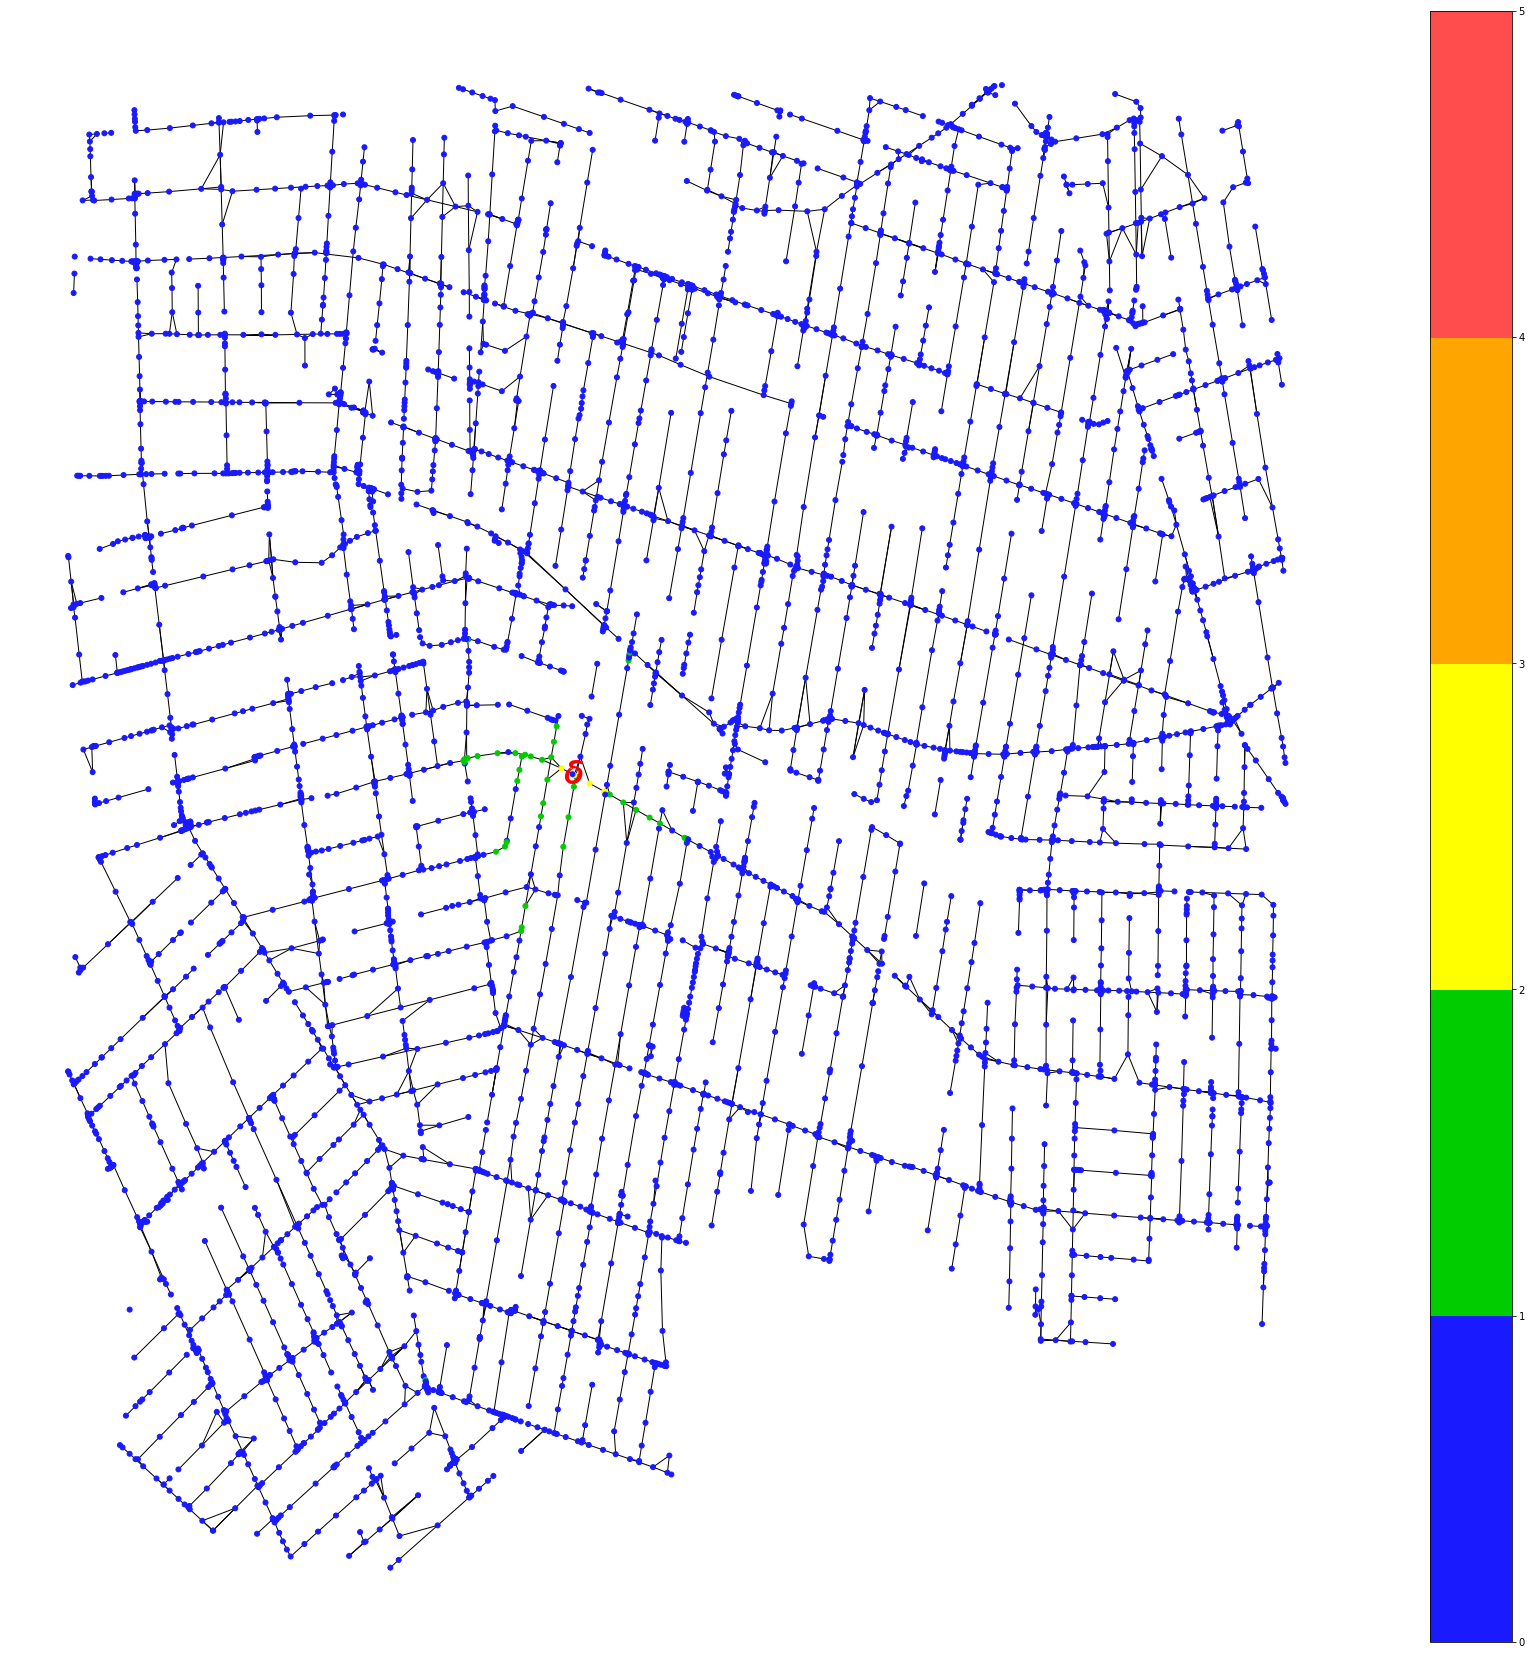

In [51]:
d2plotname = dirpltpath+"/"+name32_11+"_2D_velo_deviation.png"
print(d2plotname)
draw_2d_flow_color(color_indexed32_11,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak31.csv_2D_velo_deviation.png
Current size: [30, 30]


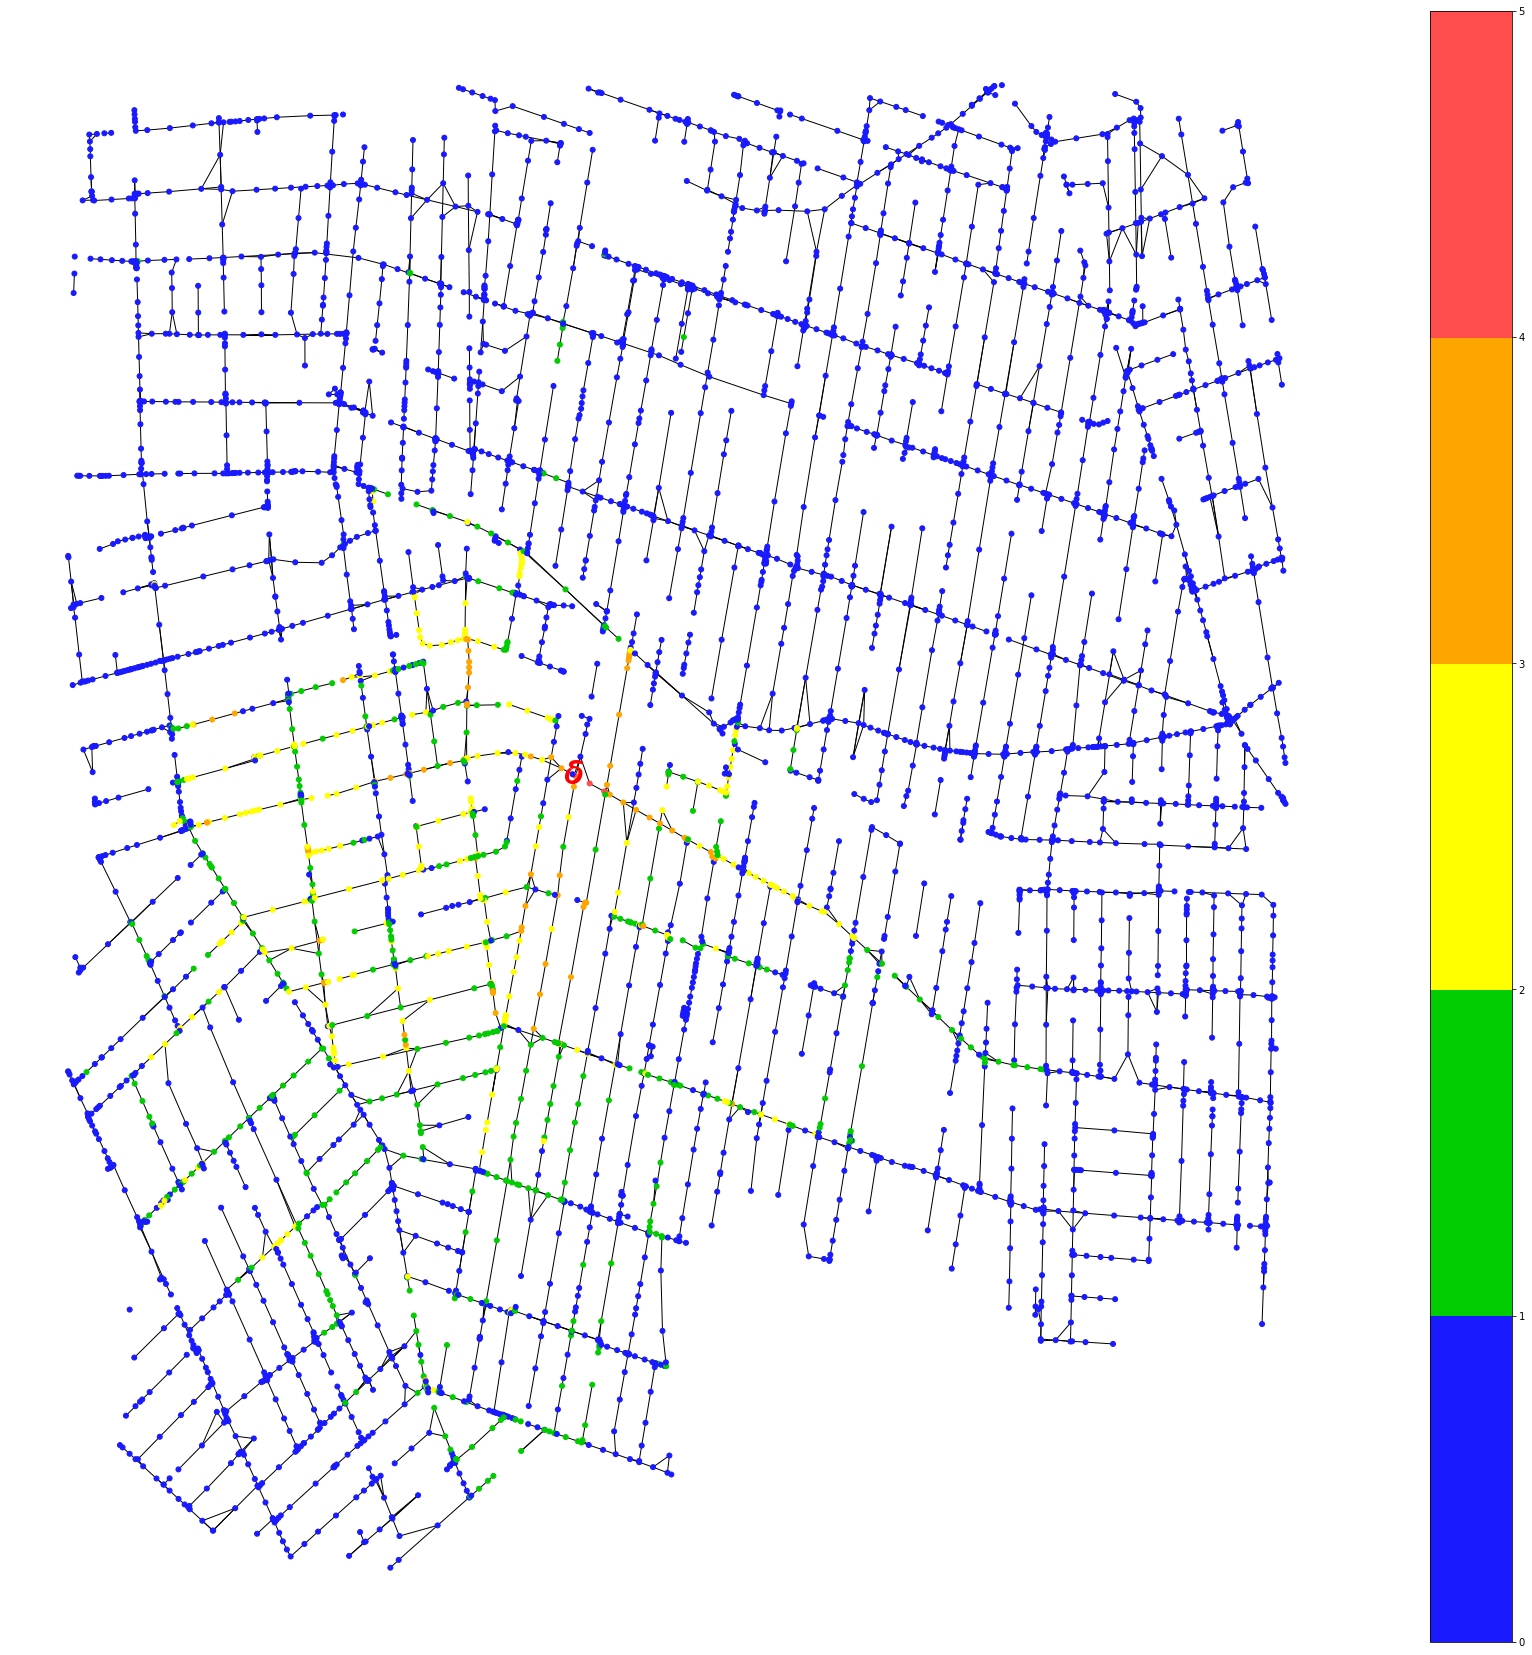

In [52]:
d2plotname = dirpltpath+"/"+name32_31+"_2D_velo_deviation.png"
print(d2plotname)
draw_2d_flow_color(color_indexed32_31,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak21.csv_2D_velo_deviation.png
Current size: [30, 30]


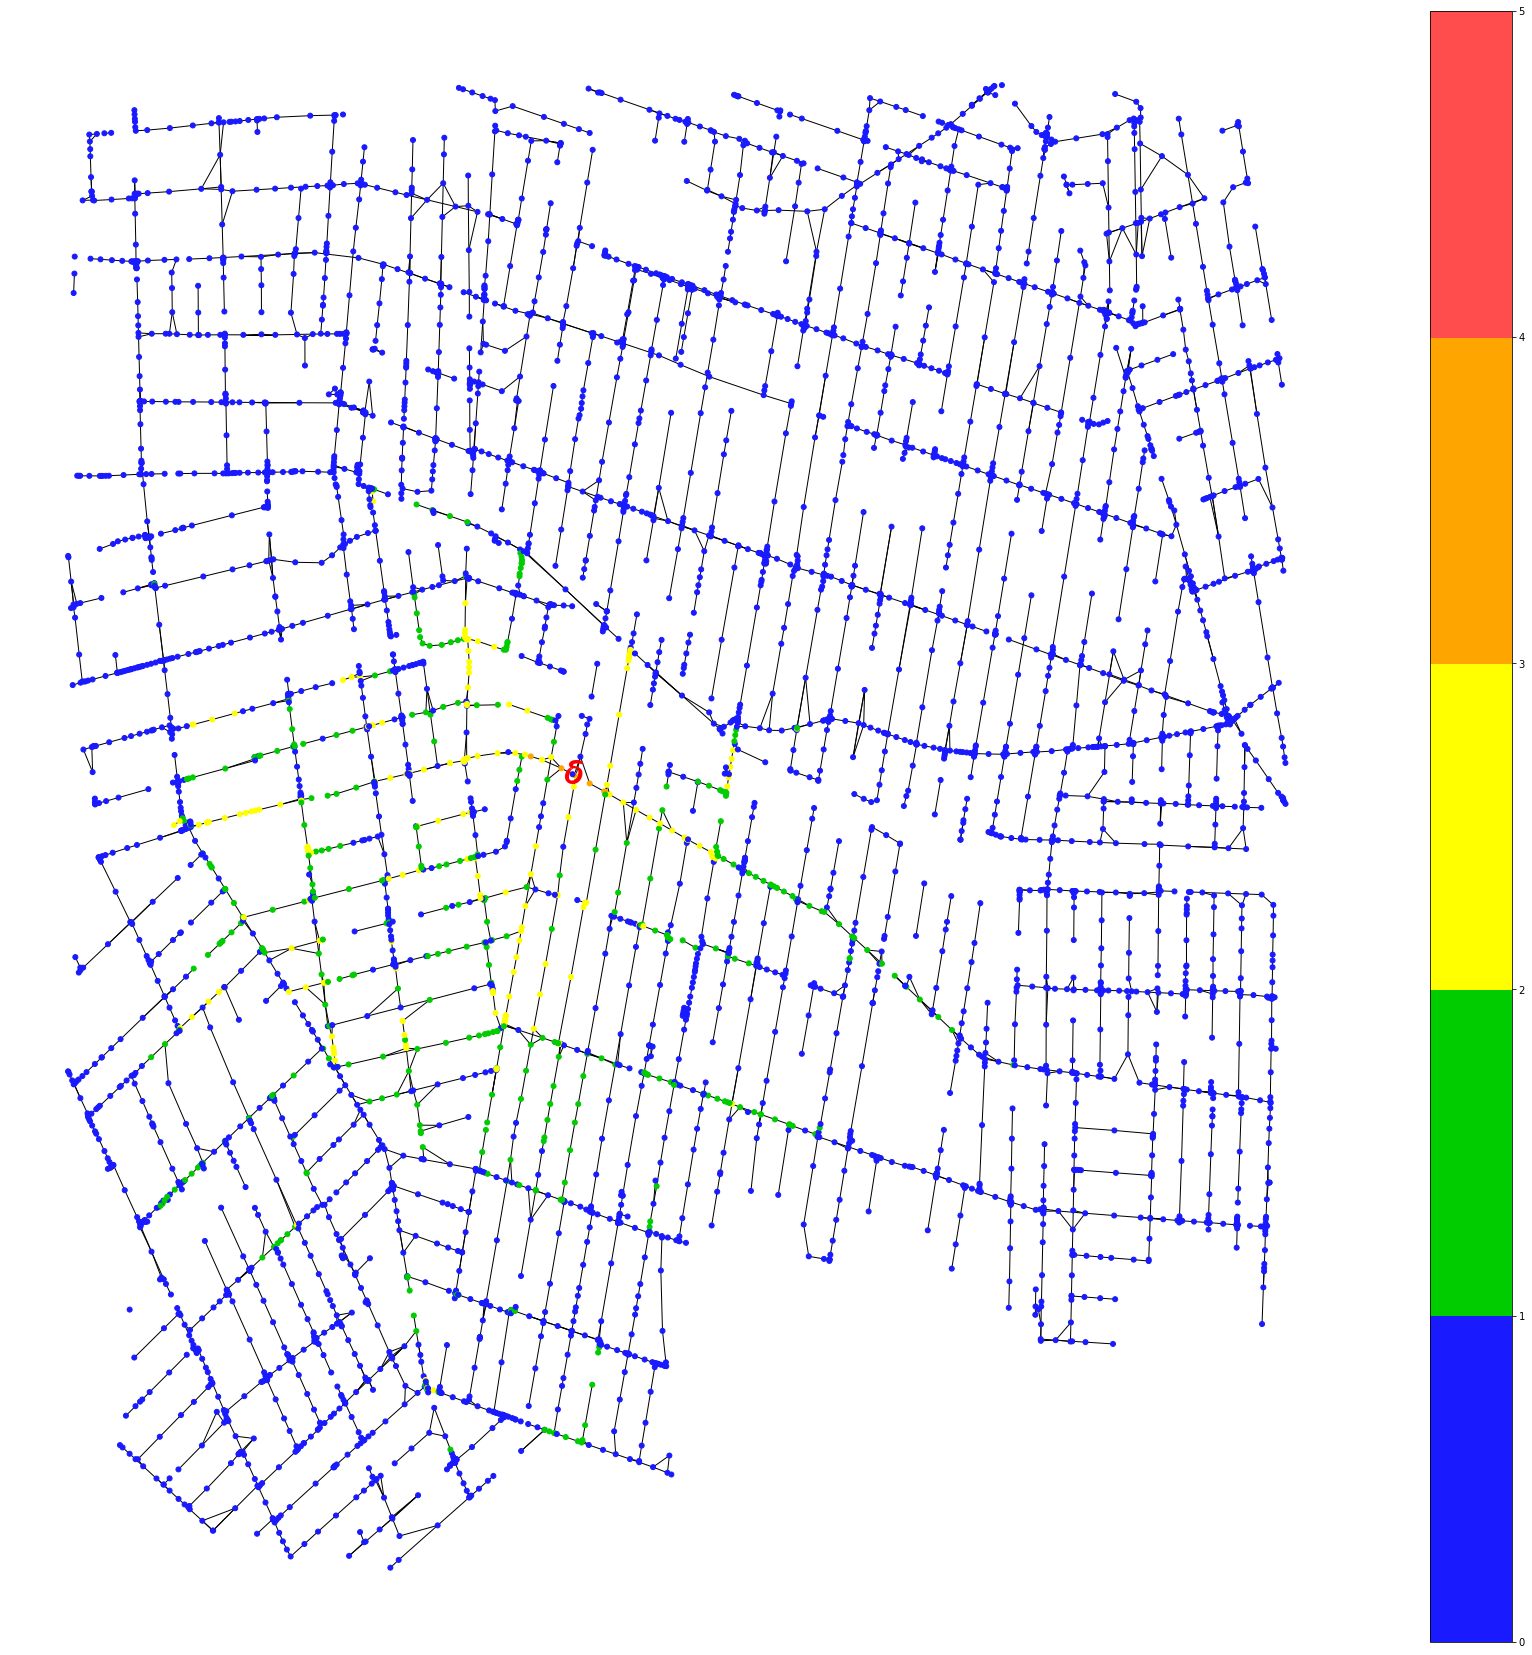

In [53]:
d2plotname = dirpltpath+"/"+name32_21+"_2D_velo_deviation.png"
print(d2plotname)
draw_2d_flow_color(color_indexed32_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak41.csv_2D_velo_deviation.png
Current size: [30, 30]


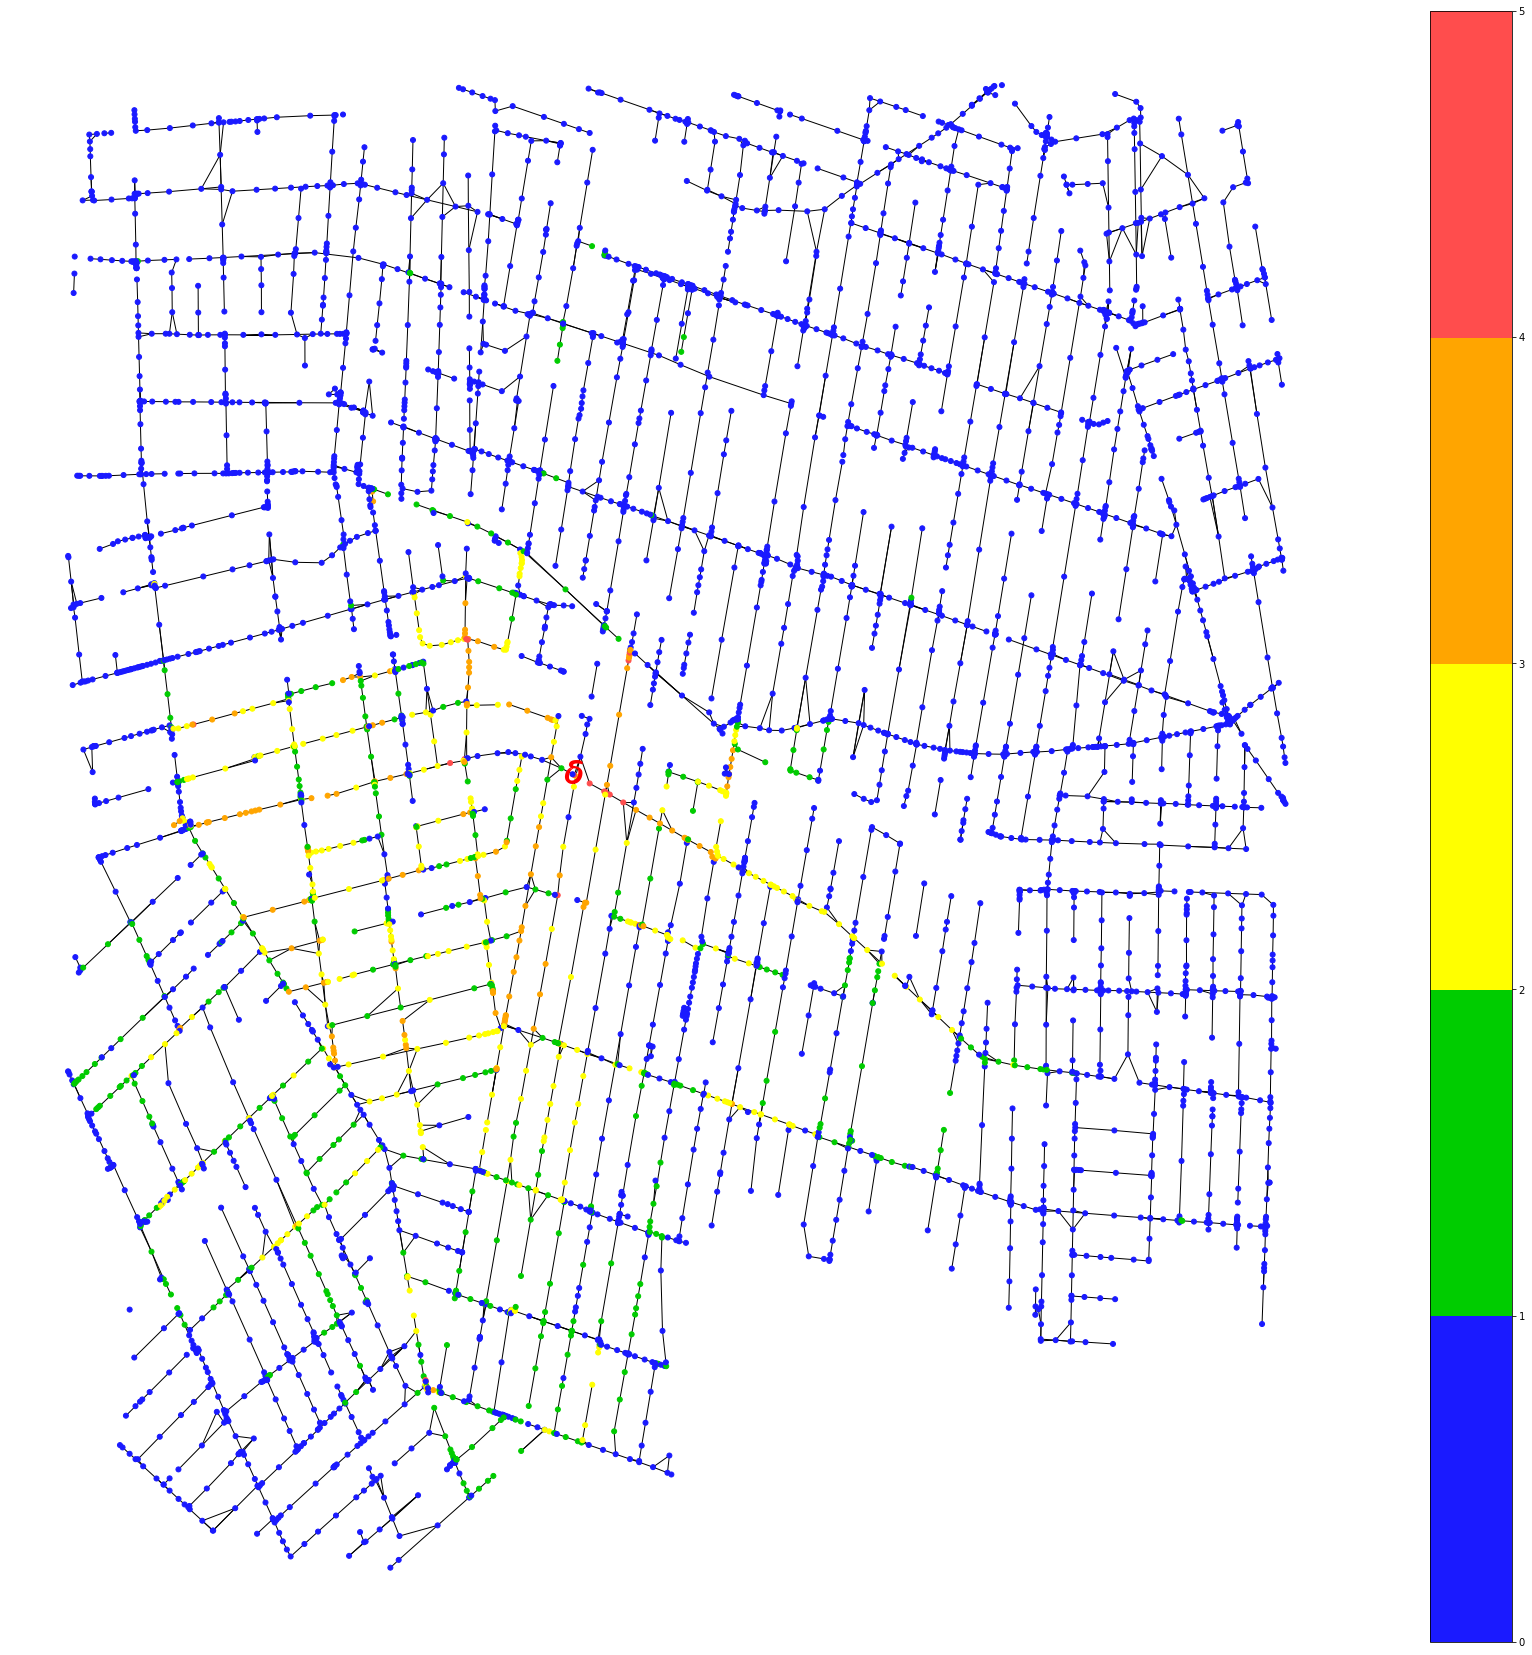

In [54]:
d2plotname = dirpltpath+"/"+name32_41+"_2D_velo_deviation.png"
print(d2plotname)
draw_2d_flow_color(color_indexed32_41,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/Data_ZeroDeg_Pipes_Leak1_2D_velo_deviation.png
Current size: [30, 30]


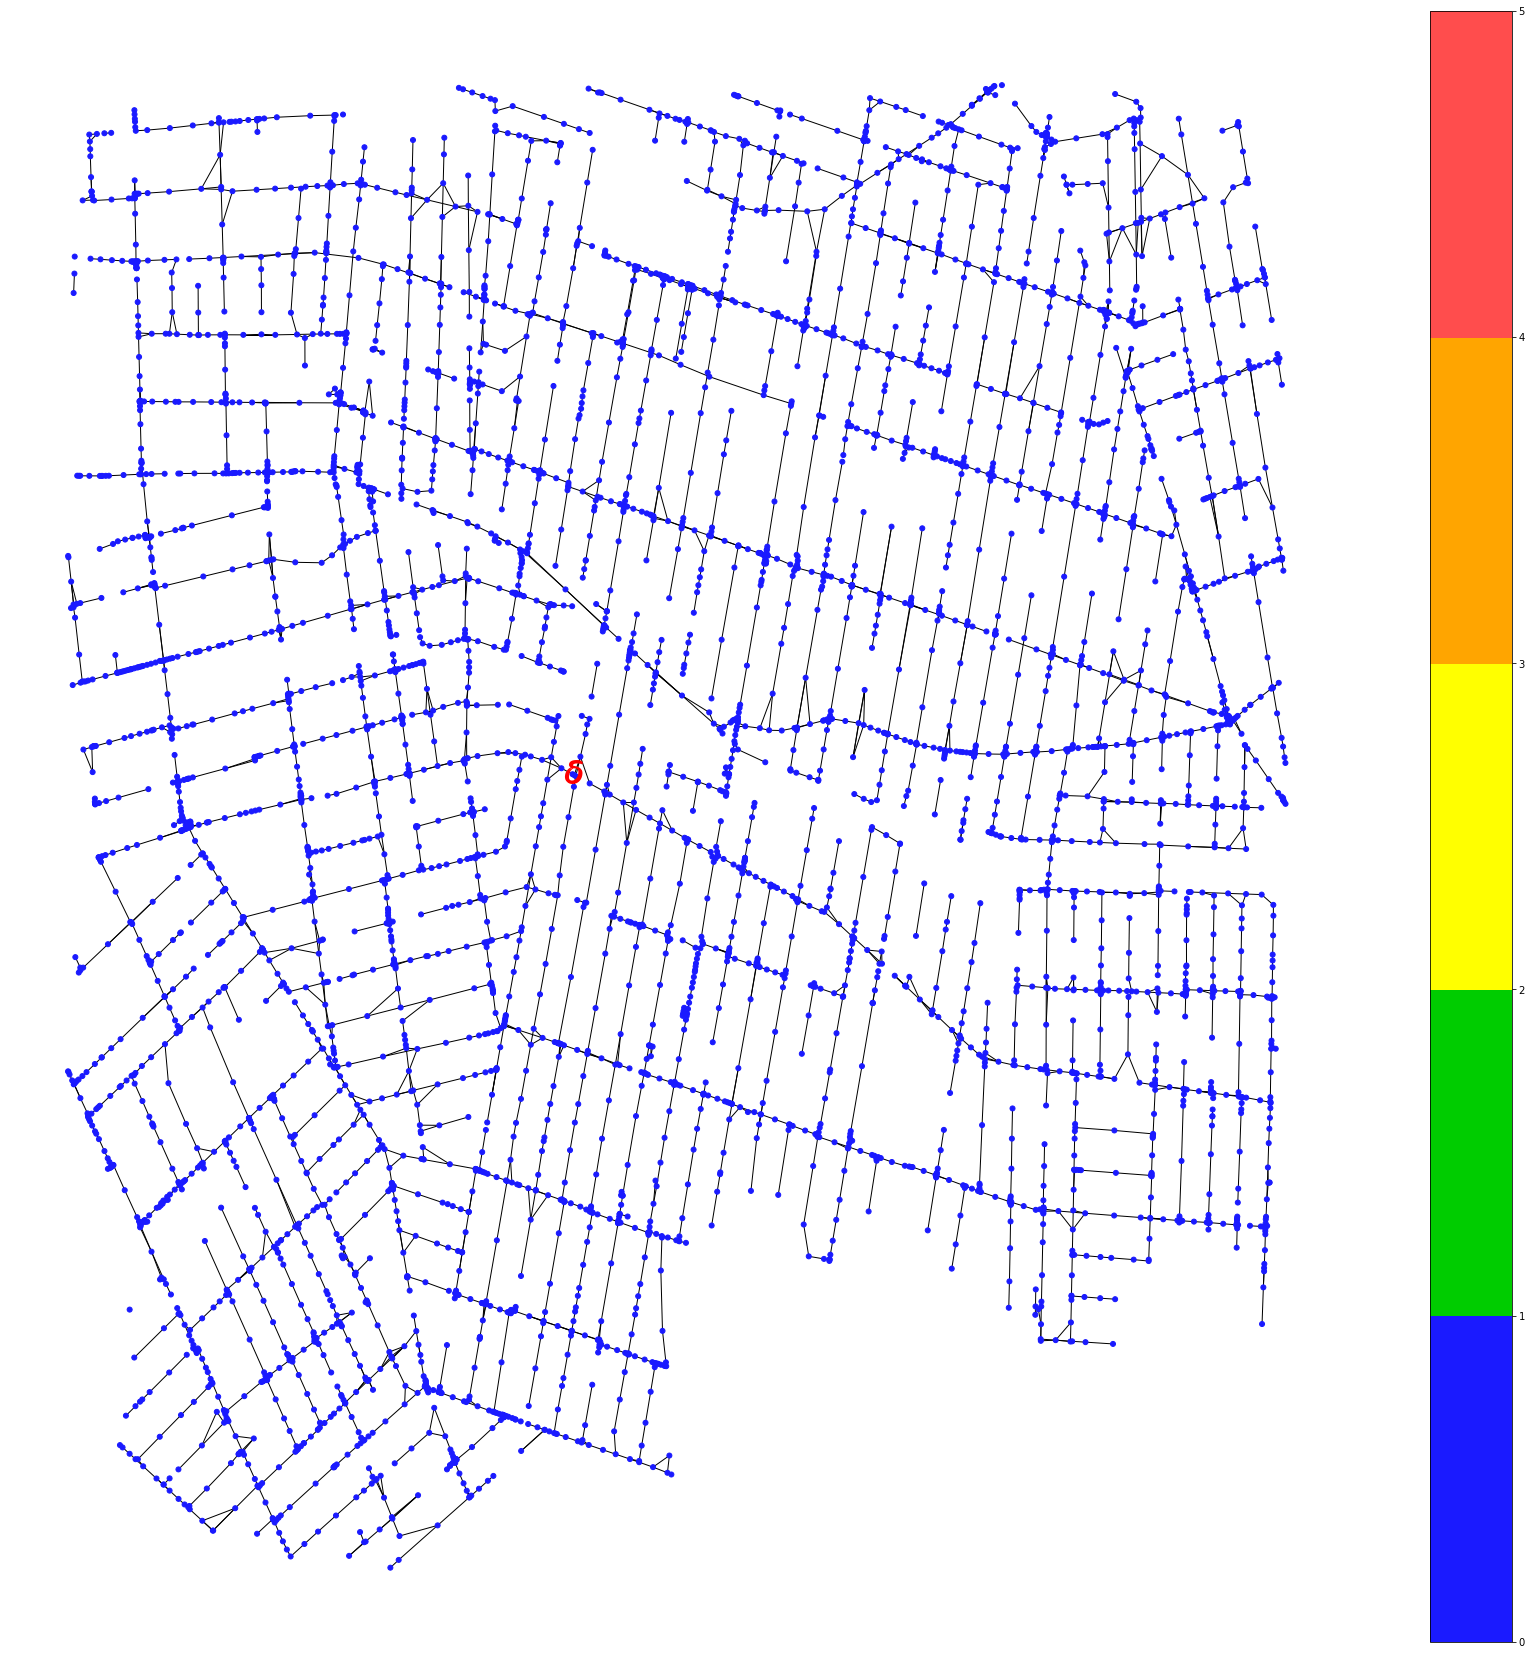

In [55]:
d2plotname = dirpltpath+"/"+"Data_ZeroDeg_Pipes_Leak1_2D_velo_deviation.png"
print(d2plotname)
draw_2d_flow_color(color_indexed32_1,d2plotname)

In [56]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_color(graphArr,d3plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME



    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','']])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(keys_all)

    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['flow'] = 0
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        name = i[0]
        G.add_edge(psource, pdest, n = name)


    def network_plot_3D(G, angle, save=True):
    
        lower = 0
        upper = 5
        #tp_arr = (graphArr['VELOpipeFPS']-lower)/(upper-lower)
        #tp2 = [float(i) for i in tp_arr]
        
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        #cmap= matplotlib.colors.ListedColormap(colors)
        #cmap.set_under("crimson")
        #cmap.set_over("w")
        #norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        #mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        #cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Flow Deviation', fontsize=30)
            ax.set_zlim(lower,upper)
            
            ctr=0
            for key, value in midpos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                p = ax.scatter(xi, yi, zi, c=colors[zi], alpha=0.7, s=80,cmap=colors)
                ctr=ctr+1
            d3pos_dict0.update(midpos_dict0)

        
            for i in edges:
                x = np.array((d3pos_dict0[i[0]][0][0],d3pos_dict0[i[1]][0][0] ))
                y = np.array((d3pos_dict0[i[0]][0][1], d3pos_dict0[i[1]][0][1]))
                z = np.array((d3pos_dict0[i[0]][1], d3pos_dict0[i[1]][1]))

                ax.plot(x, y, z, c='gray',alpha=0.5)
            #fig.colorbar(p)


        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        

        
        plt.savefig(d3plotname)
        plt.show()

        return

    network_plot_3D(G, 60)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak11.csv_3D_velo_deviation.png


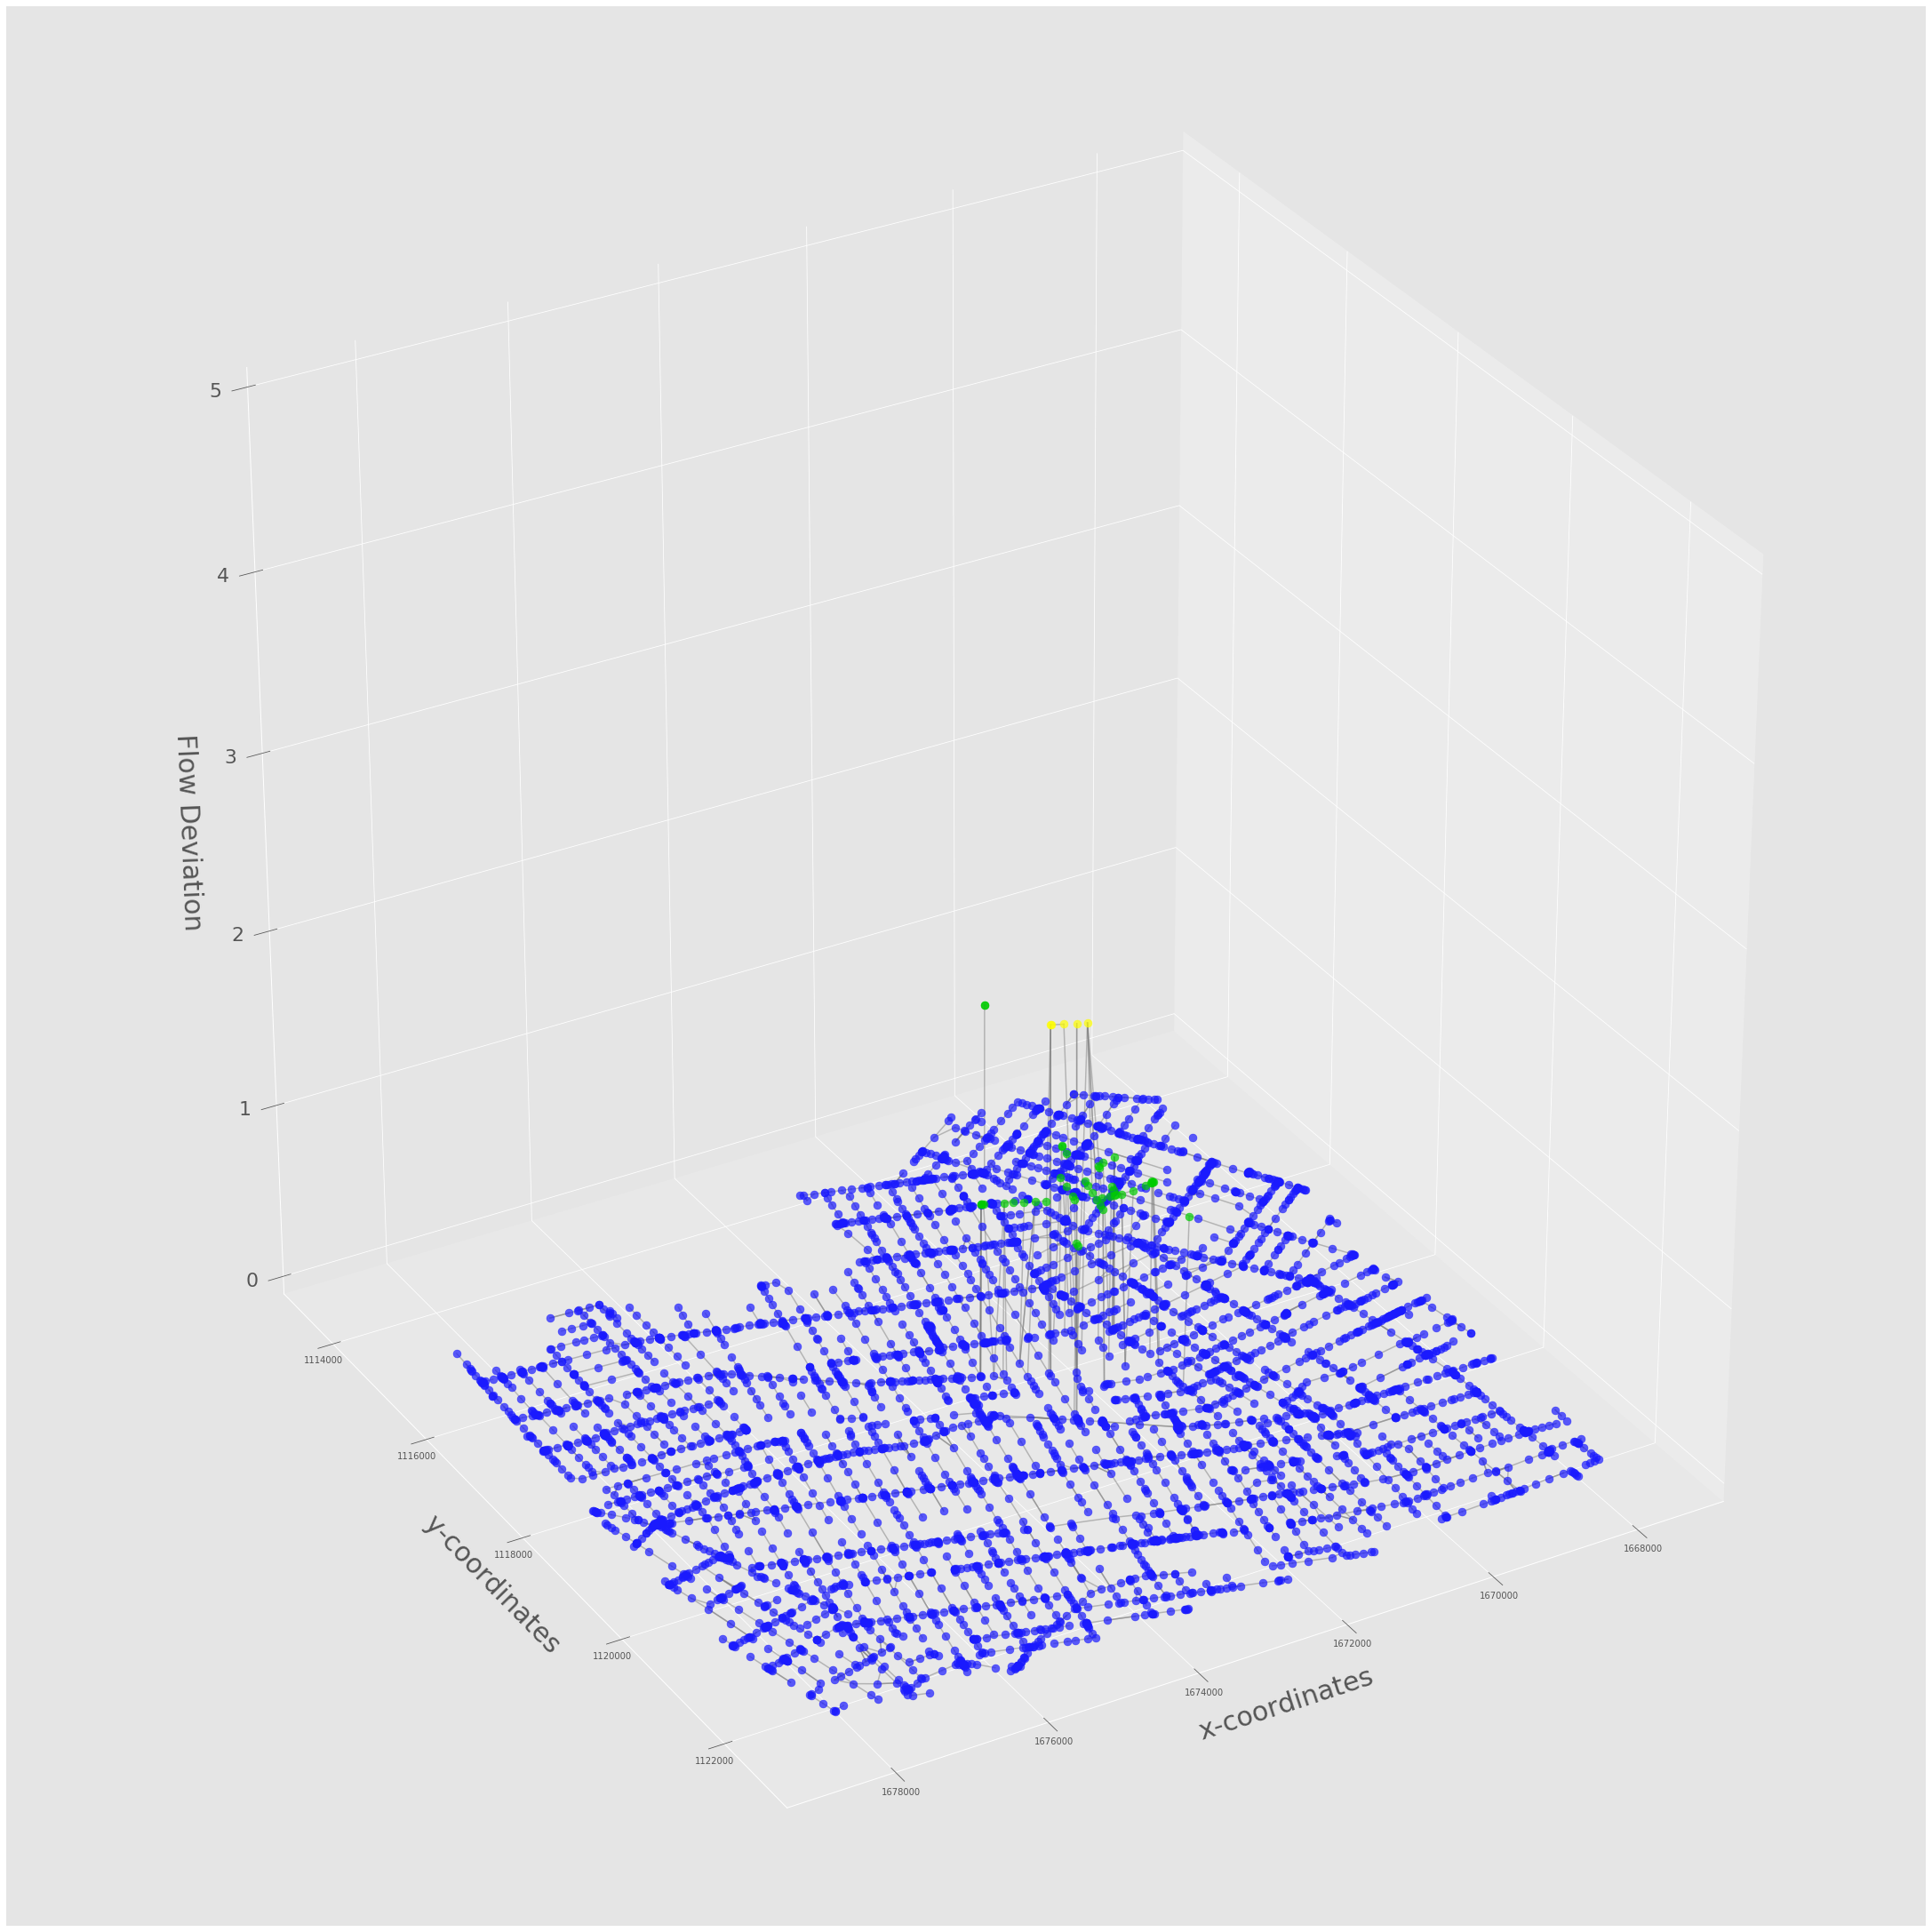

In [57]:
d3plotname = dirpltpath+"/"+name32_11+"_3D_velo_deviation.png"
print(d3plotname)
draw_3d_color(color_indexed32_11,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak21.csv_3D_velo_deviation.png


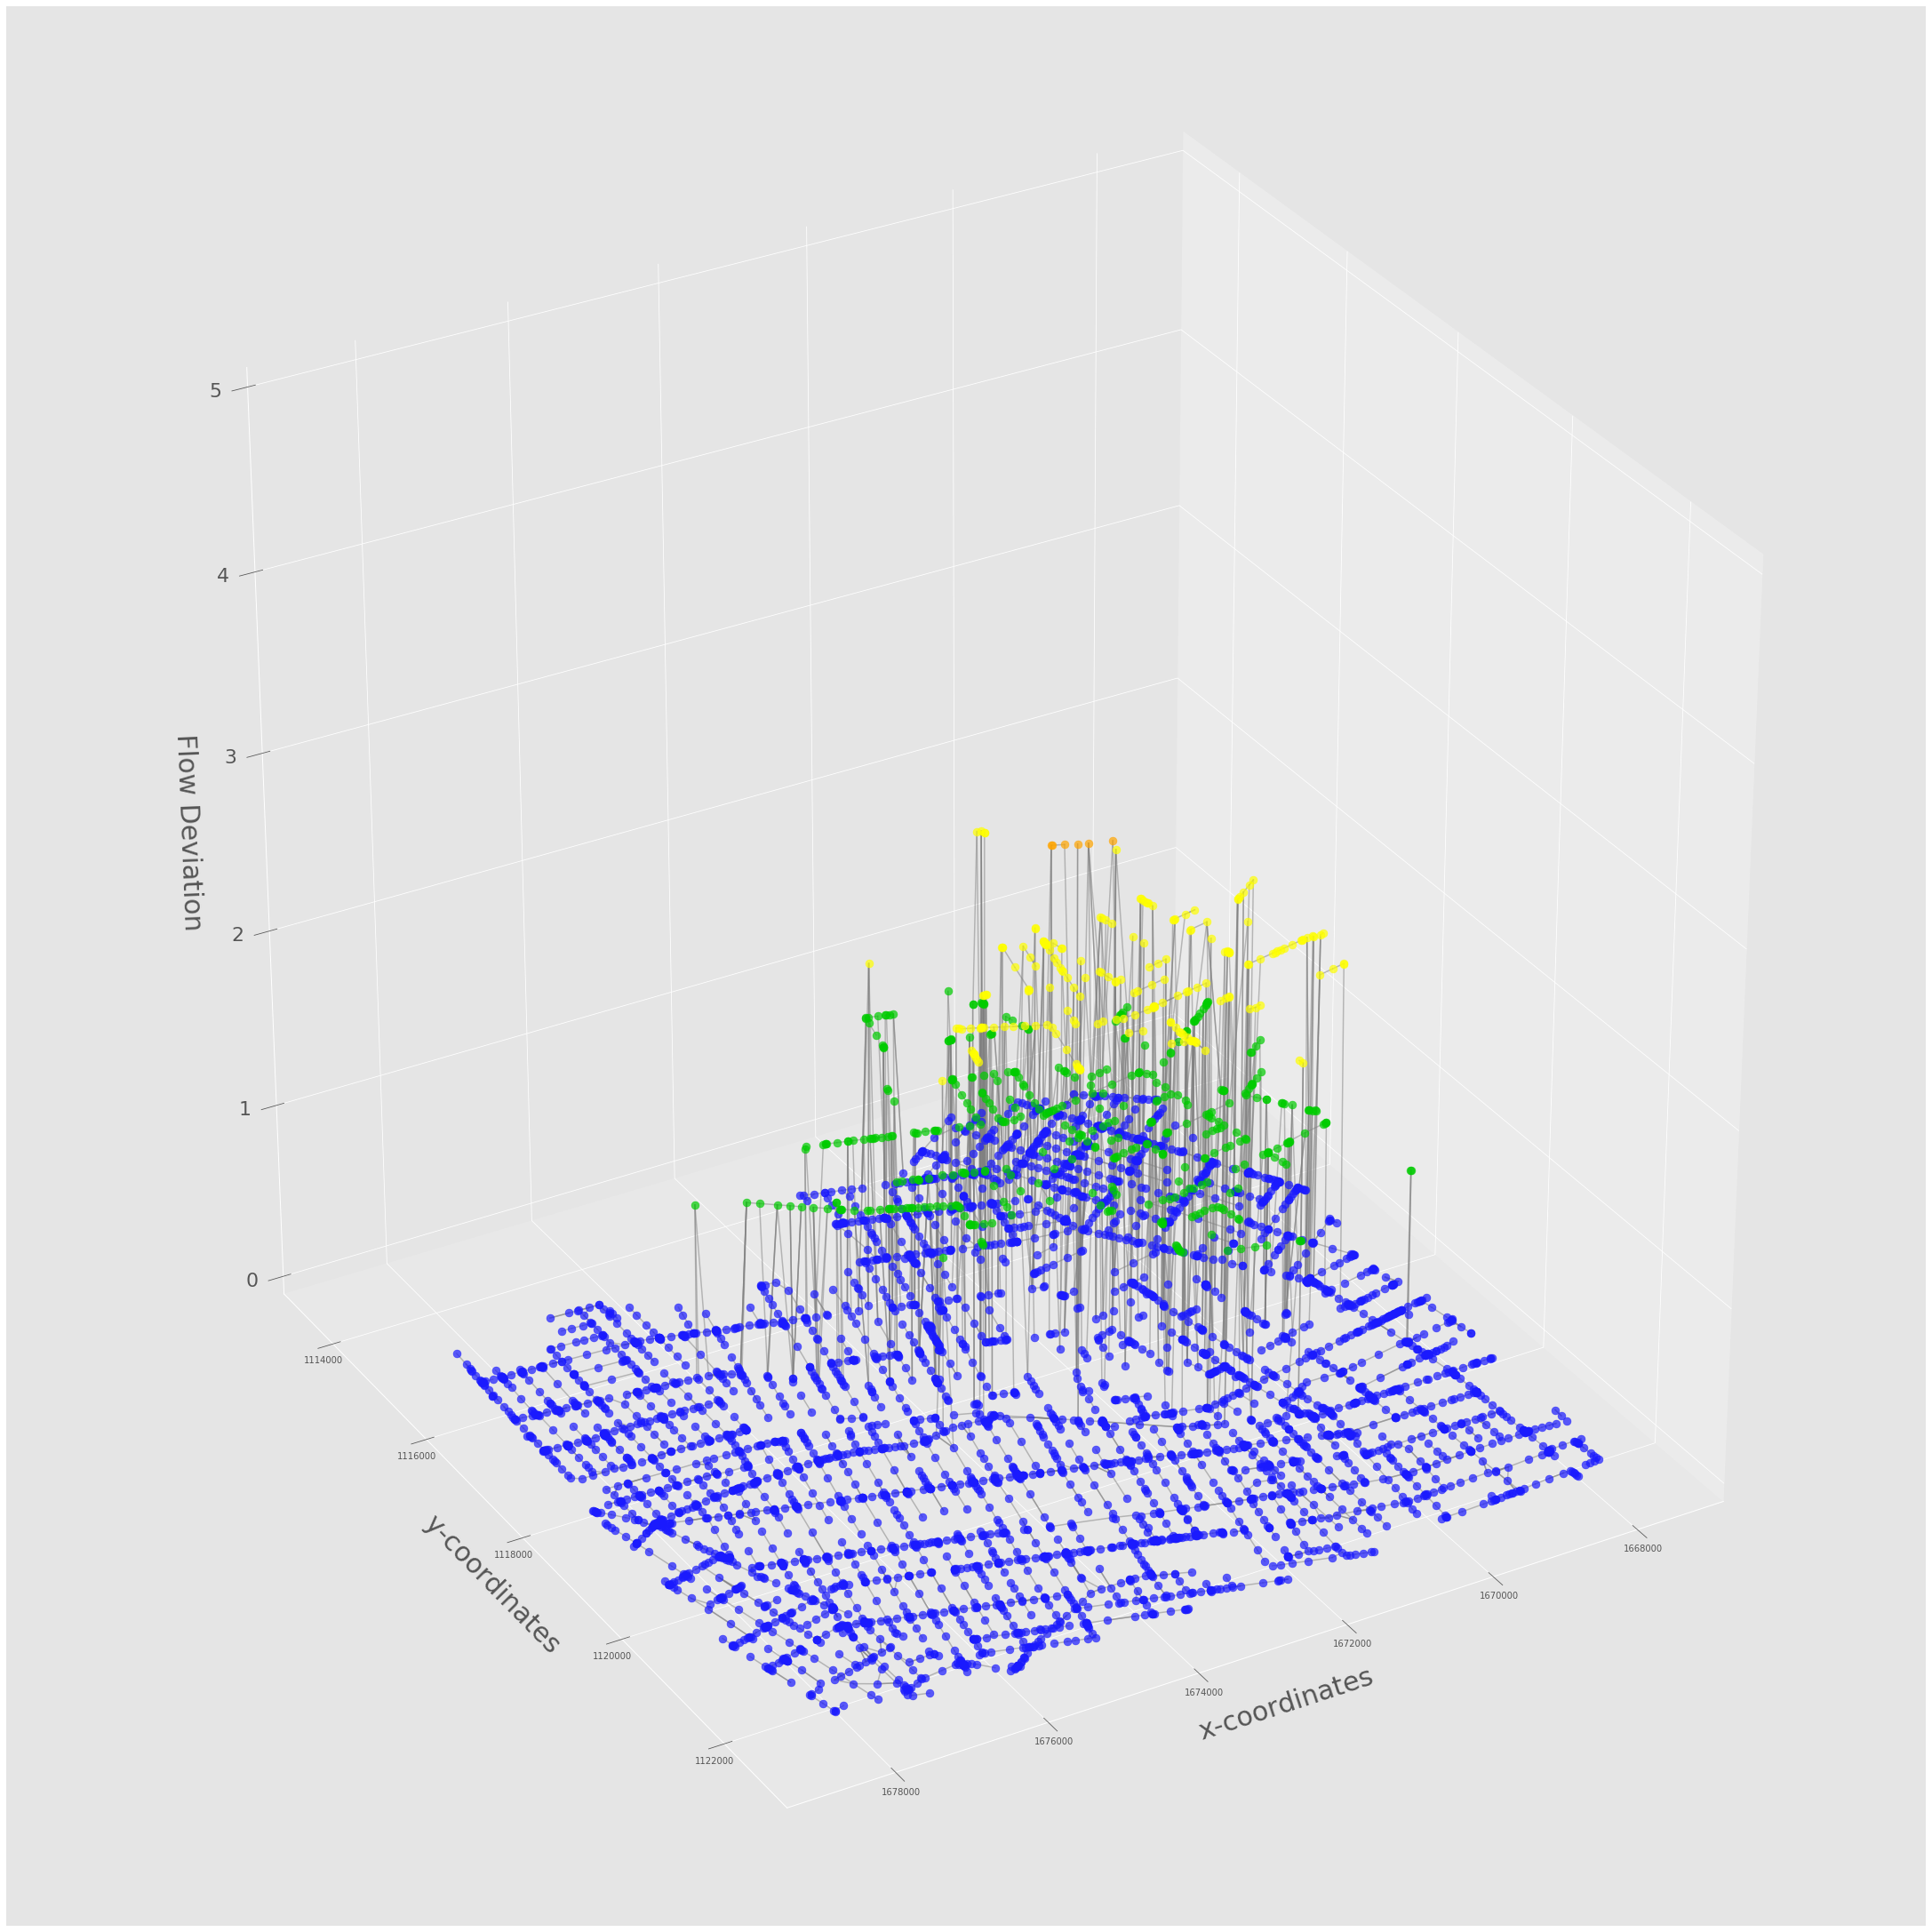

In [58]:
d3plotname = dirpltpath+"/"+name32_21+"_3D_velo_deviation.png"
print(d3plotname)
draw_3d_color(color_indexed32_21,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak31.csv_3D_velo_deviation.png


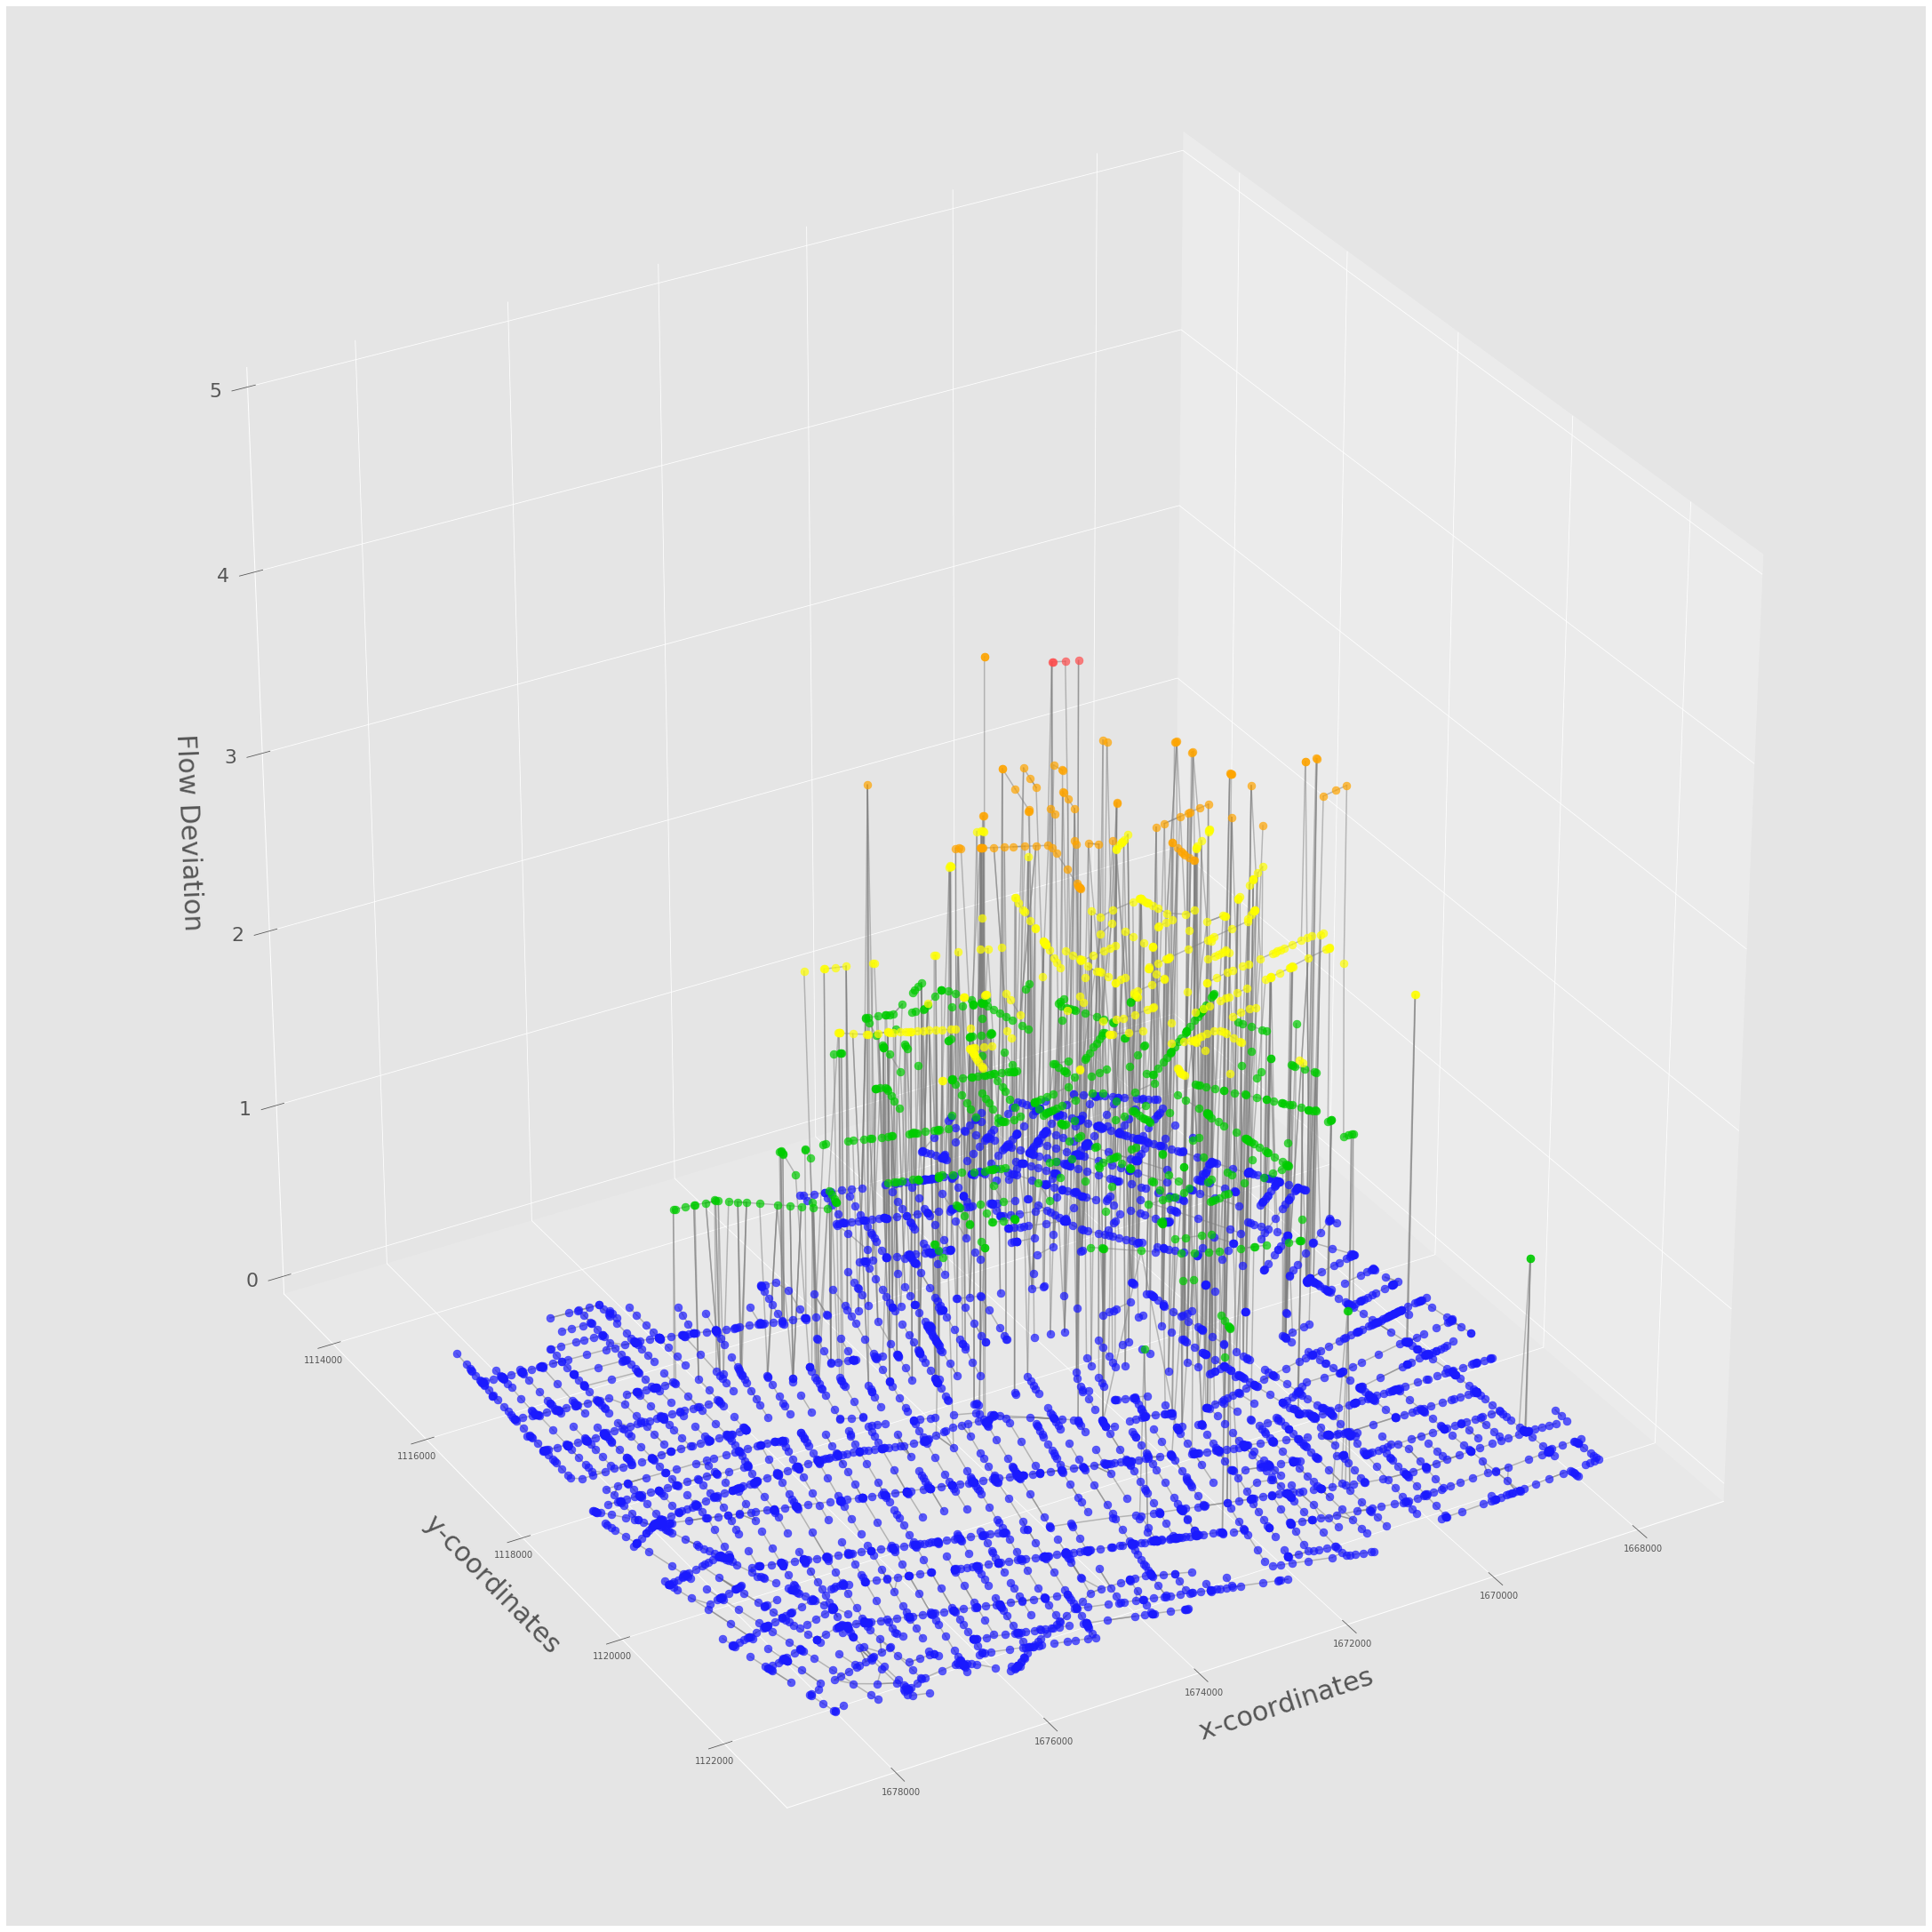

In [59]:
d3plotname = dirpltpath+"/"+name32_31+"_3D_velo_deviation.png"
print(d3plotname)
draw_3d_color(color_indexed32_31,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak41.csv_3D_velo_deviation.png


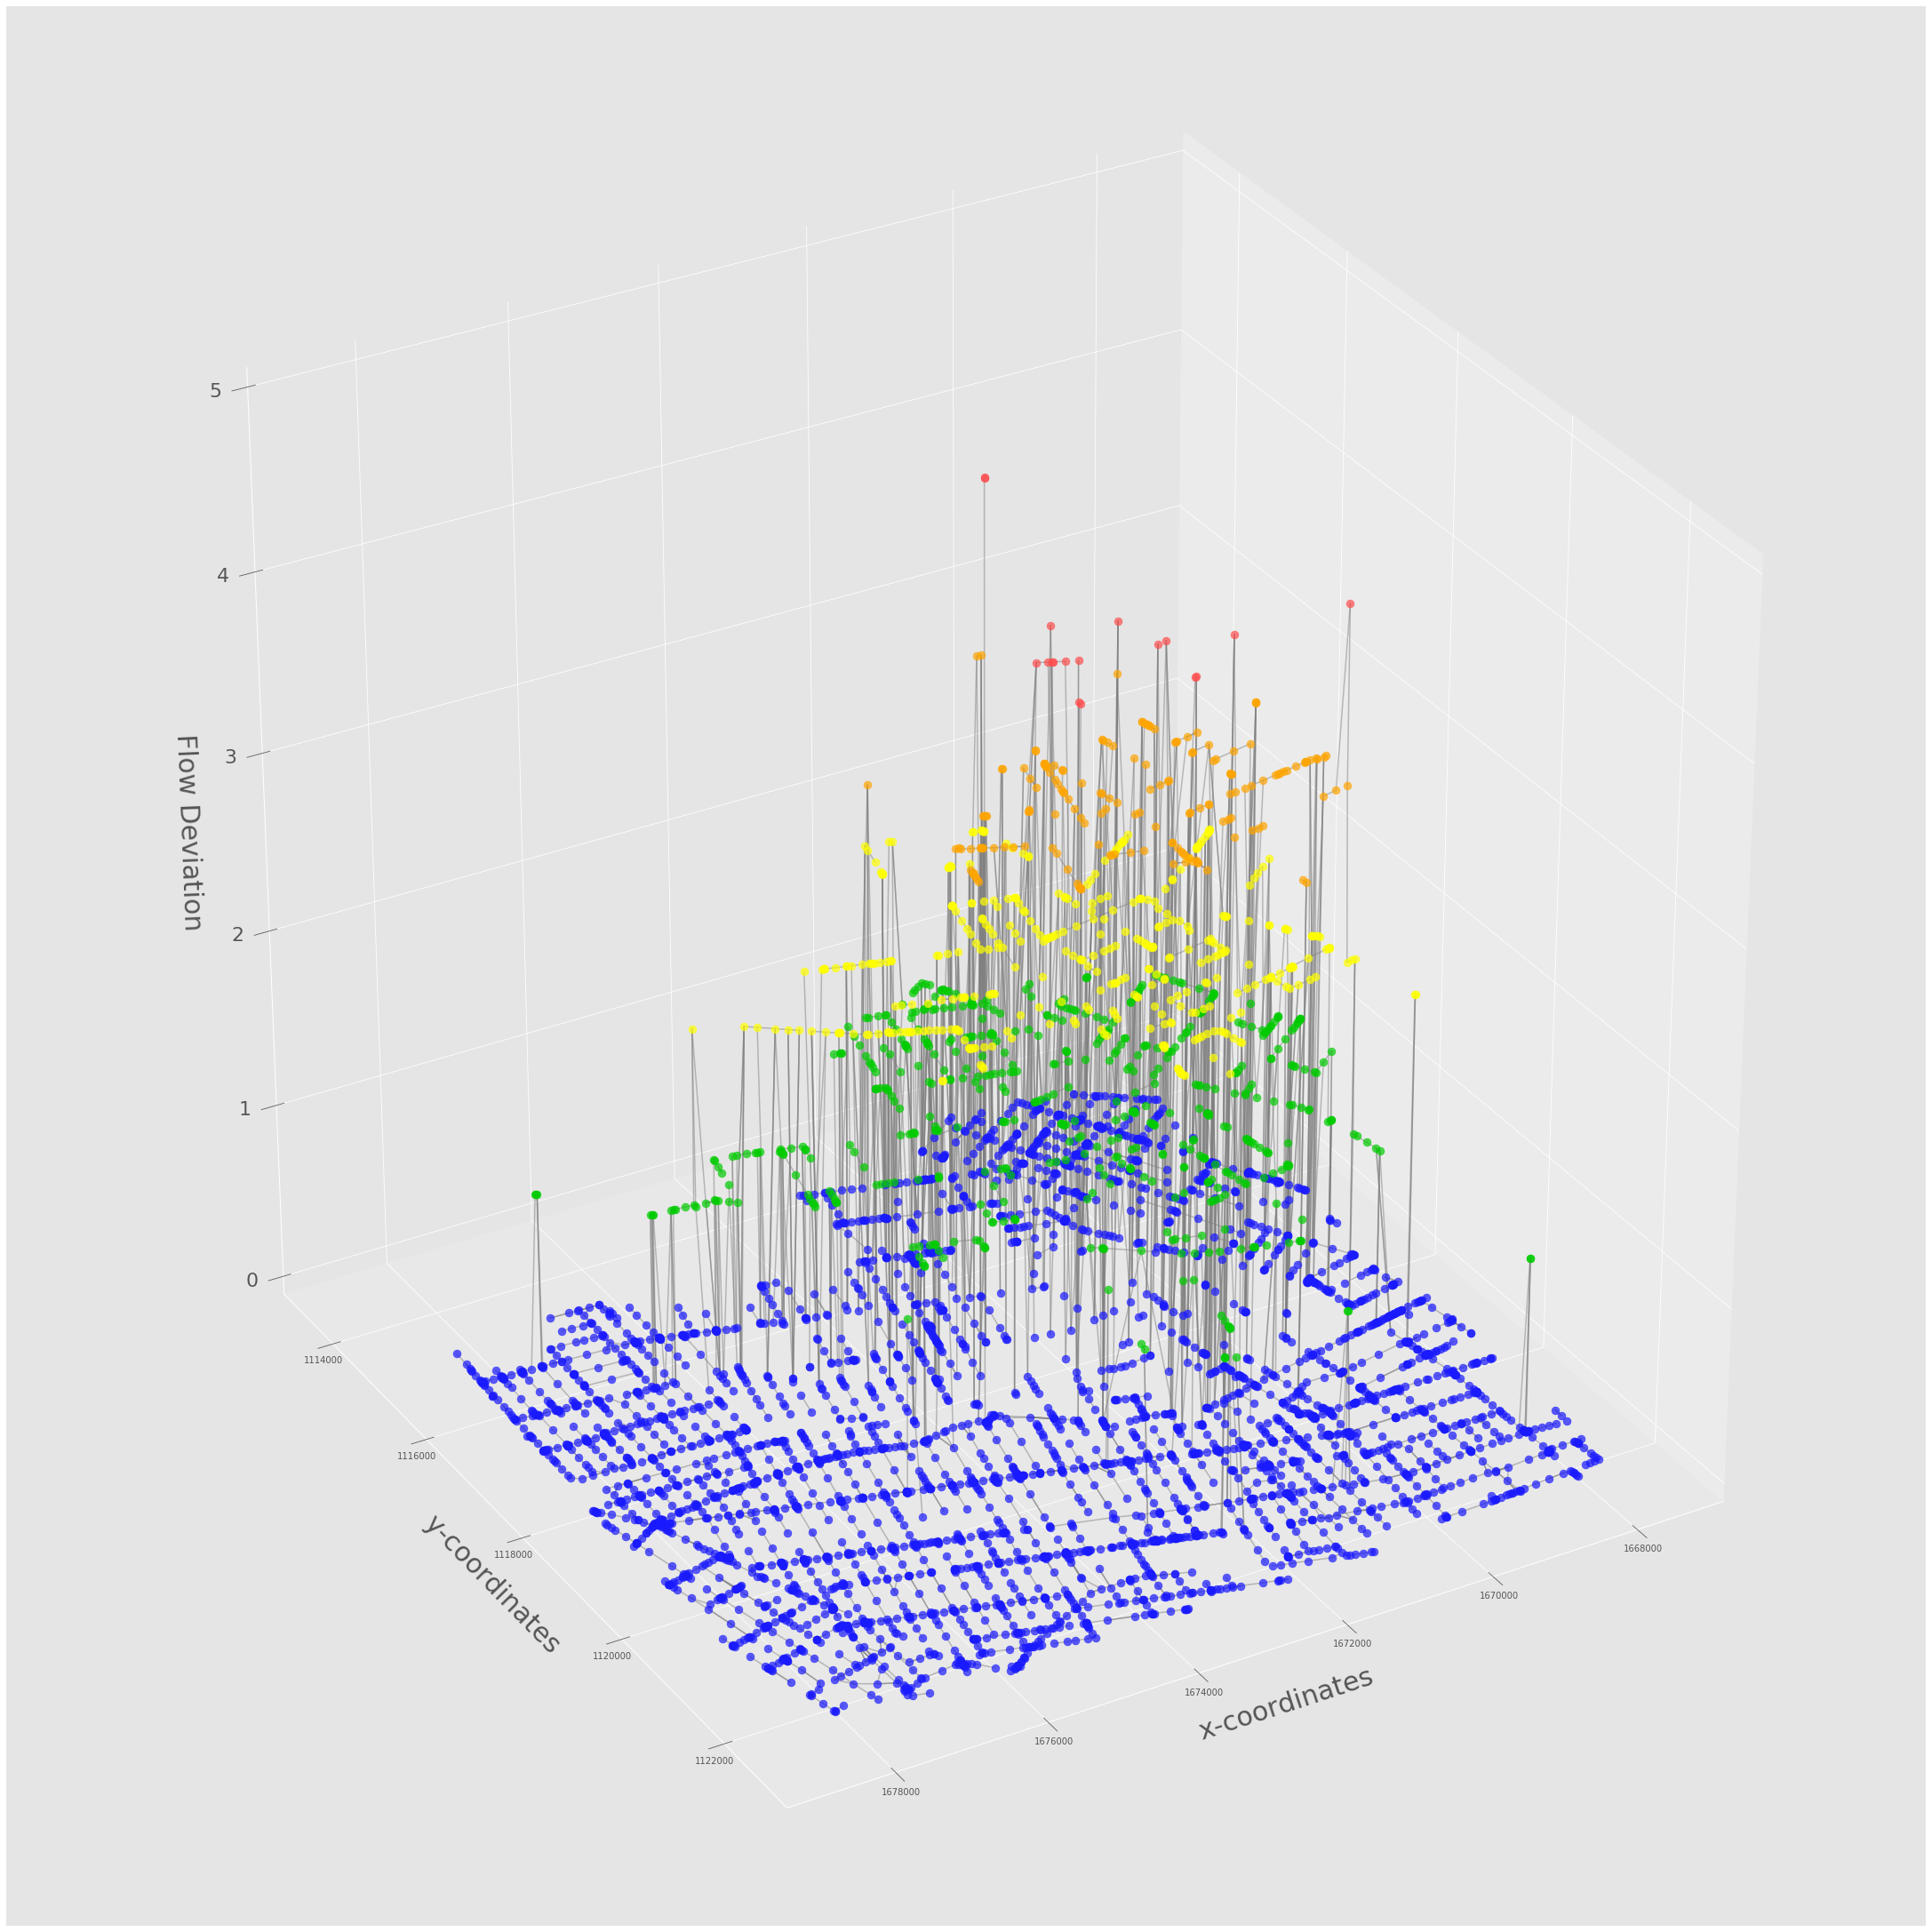

In [60]:
d3plotname = dirpltpath+"/"+name32_41+"_3D_velo_deviation.png"
print(d3plotname)
draw_3d_color(color_indexed32_41,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/Data_ZeroDeg_Pipes_Leak1_3D_velo_deviation.png


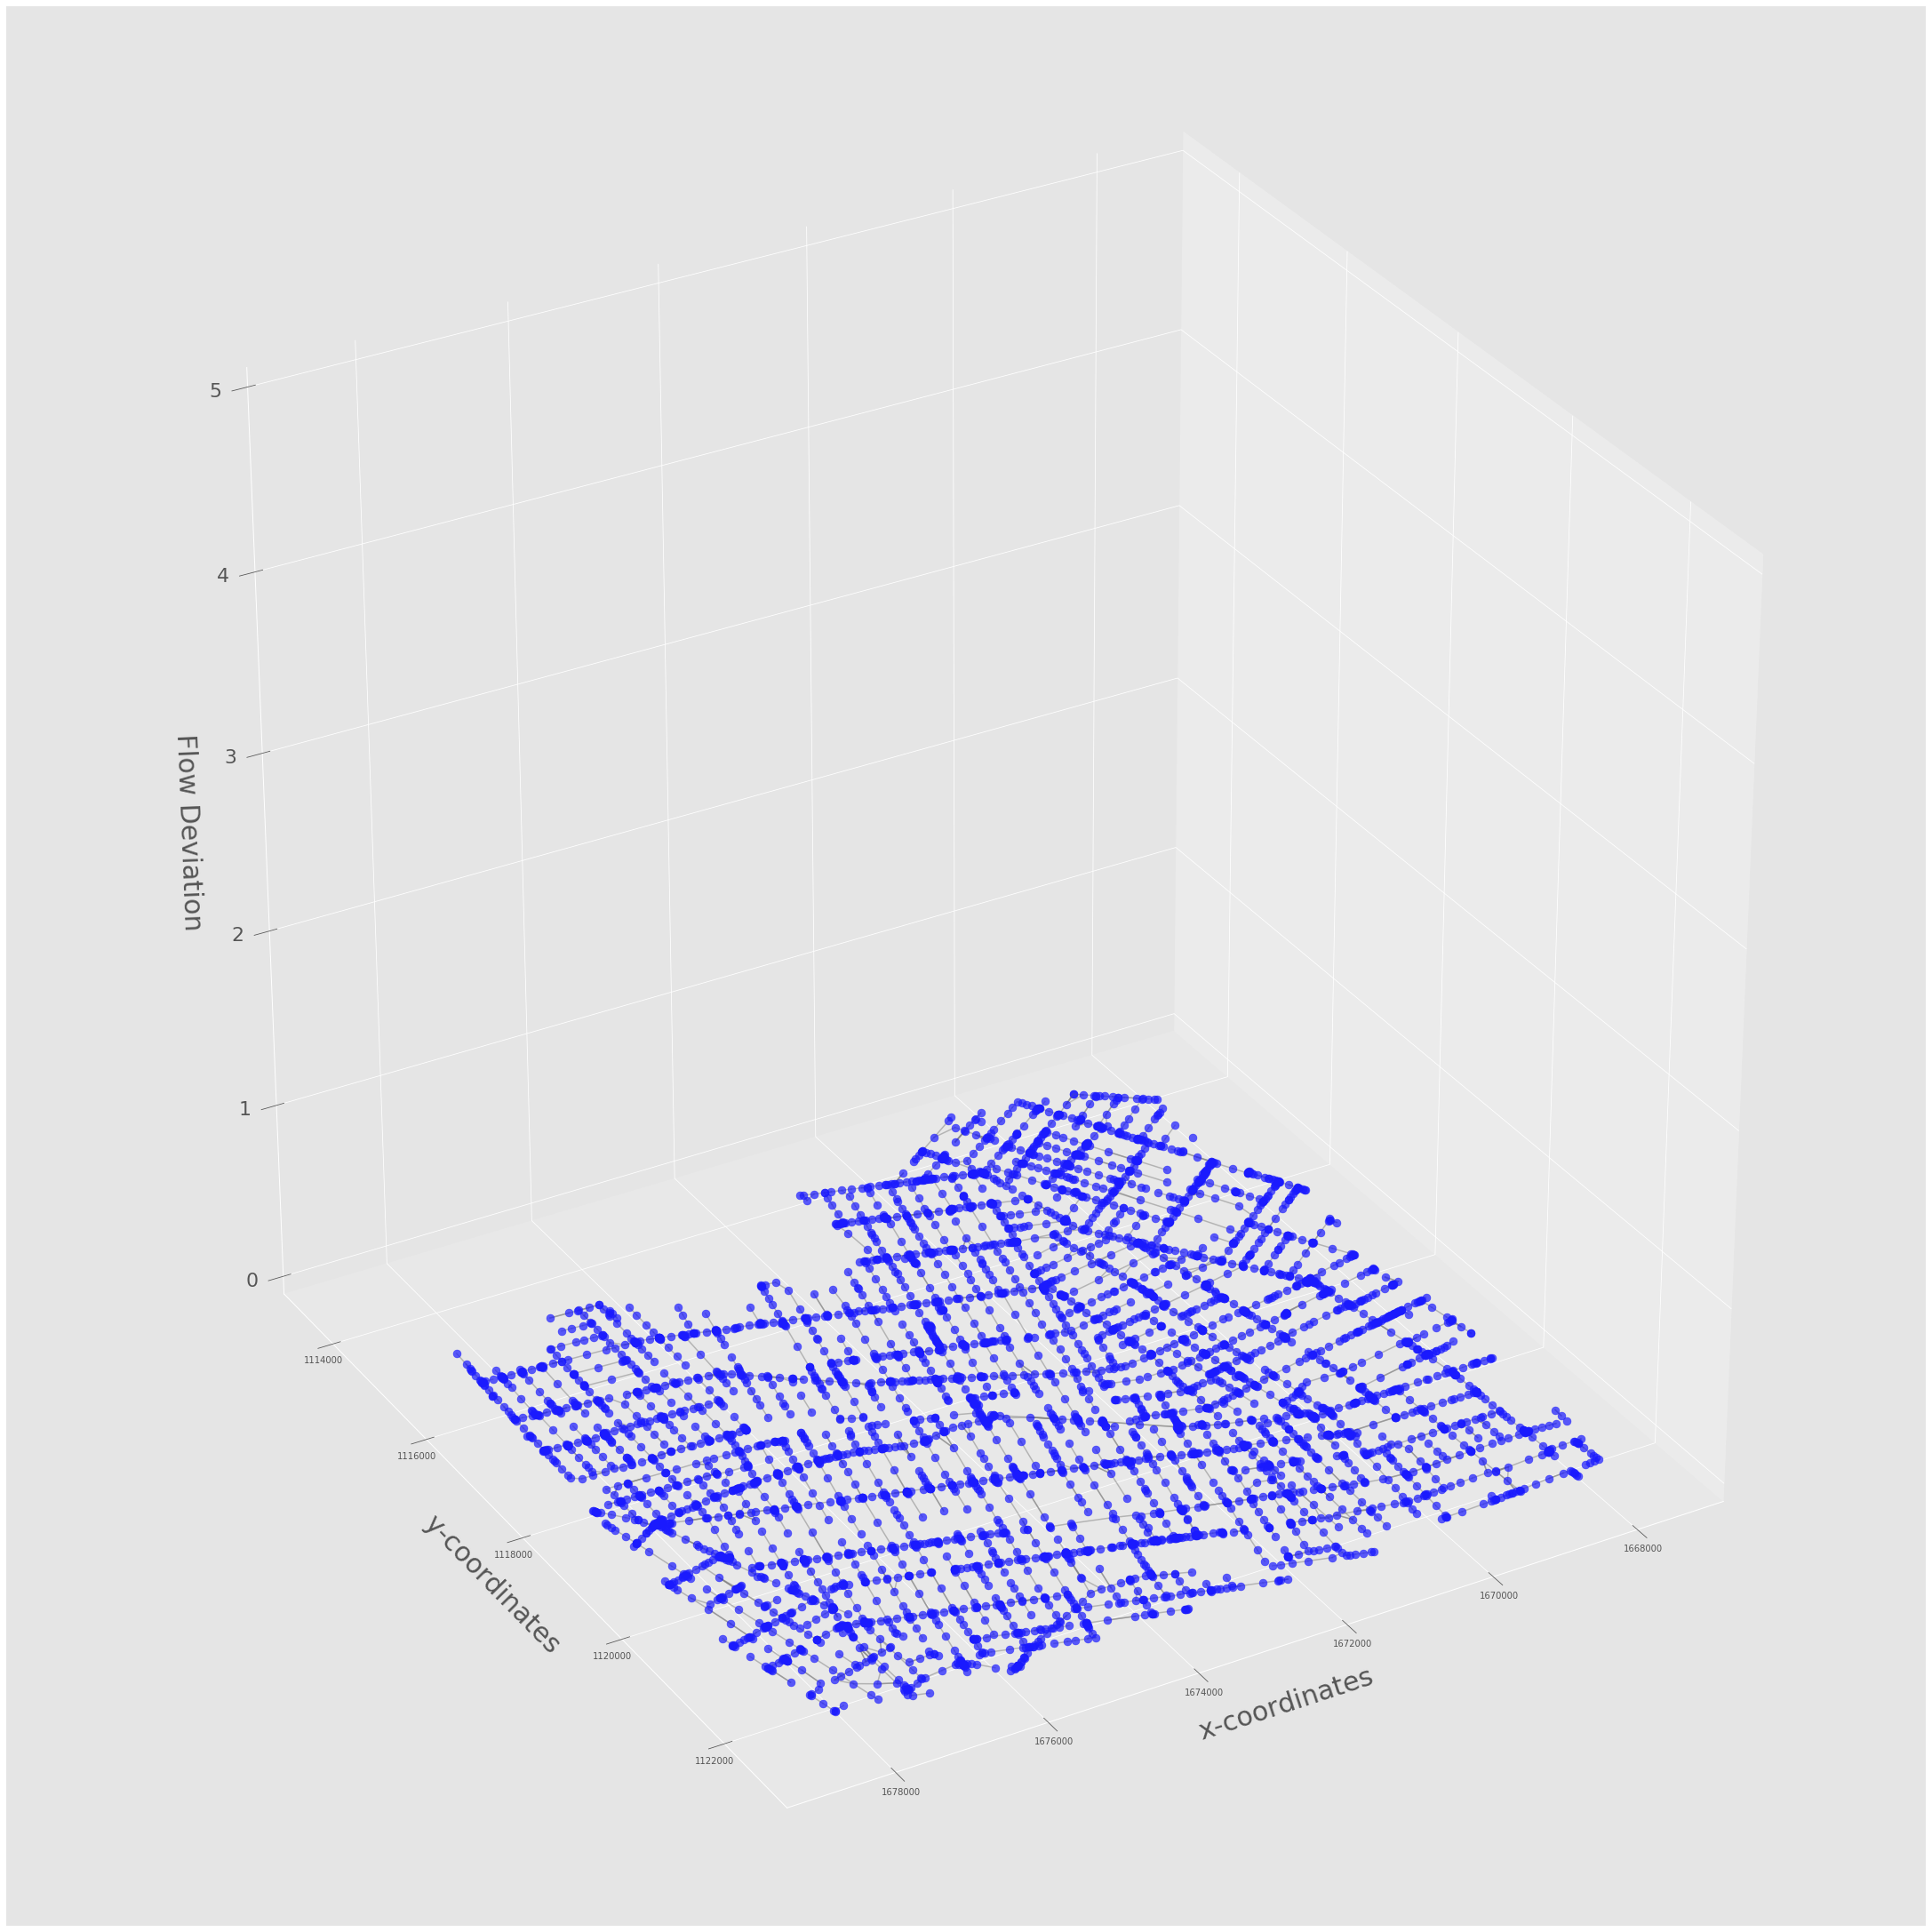

In [61]:
d3plotname = dirpltpath+"/"+"Data_ZeroDeg_Pipes_Leak1_3D_velo_deviation.png"
print(d3plotname)
draw_3d_color(color_indexed32_1,d3plotname)

In [42]:
max(res64_41.VELOpipeFPS)

0.3388456203725569

In [109]:
def save_data_file(temp):
    if temp == 16:
        arr1=color_indexed1
        arr11=color_indexed11
        arr21=color_indexed21
        arr31=color_indexed31
        arr41=color_indexed41
    elif temp==0:
        arr1=color_indexed0_1
        arr11=color_indexed0_11
        arr21=color_indexed0_21
        arr31=color_indexed0_31
        arr41=color_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1
        arr11=color_indexed32_11
        arr21=color_indexed32_21
        arr31=color_indexed32_31
        arr41=color_indexed32_41
    elif temp==48:
        arr1=color_indexed48_1
        arr11=color_indexed48_11
        arr21=color_indexed48_21
        arr31=color_indexed48_31
        arr41=color_indexed48_41
    elif temp==64:
        arr1=color_indexed64_1
        arr11=color_indexed64_11
        arr21=color_indexed64_21
        arr31=color_indexed64_31
        arr41=color_indexed64_41
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([res1.NAME,res11.NAME,res21.NAME,res31.NAME,res41.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])

    np.savetxt("data_pipes_vel"+str(temp)+".txt", final_file.T,fmt='%s')
    np.savetxt("data_pipes_vel_ind_"+str(temp)+".txt", final_file[2],fmt='%s')
    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    np.savetxt("target_nodes"+str(temp)+".txt", targets.T,fmt='%s')
    
    return final_file, targets


In [123]:
def save_data_file_500(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=color_indexed0_1_500
        arr11=color_indexed0_11_500
        arr21=color_indexed0_21_500
        arr31=color_indexed0_31_500
        arr41=color_indexed0_41_500
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([color_indexed1_500.NAME,color_indexed1_500.NAME,color_indexed1_500.NAME,color_indexed1_500.NAME,color_indexed1_500.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])

    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([p,pd,day])
    #np.savetxt("data_pipes_vel"+str(temp)+".txt", final_file.T,fmt='%s')
    #np.savetxt("data_pipes_vel_ind_"+str(temp)+".txt", final_file[2],fmt='%s')
    #np.savetxt("./data/pipes/data_pipes_vel_500_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]==4)]=1
    targets=labels
    
    #np.savetxt("target_nodes"+str(temp)+".txt", targets.T,fmt='%s')
    np.savetxt("./data/pipes/target_pipes_500_lab4_"+str(temp)+".csv",targets,delimiter=",",fmt='%s')
    
    return final_file, targets



In [124]:
final_file_0_500,target_0_500 = save_data_file_500(0)
final_file_16_500,target_16_500 = save_data_file_500(16)
final_file_32_500,target_32_500= save_data_file_500(32)
final_file_48_500,target_48_500 = save_data_file_500(48)
final_file_64_500,target_64_500 = save_data_file_500(64)

In [125]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm

In [126]:
final_file_0,target_0 = save_data_file(0)
final_file_16,target_16 = save_data_file(16)
final_file_32,target_32= save_data_file(32)
final_file_48,target_48 = save_data_file(48)
final_file_64,target_64 = save_data_file(64)


In [46]:
consolidated_file = np.concatenate((final_file_0,final_file_16,final_file_32,final_file_48,final_file_64),axis=1)
consolidated_target = np.concatenate((target_0,target_16,target_32,target_48,target_64))


In [47]:
np.unique(final_file_0[4],return_counts=True)
np.unique(target_0,return_counts=True)

(array([0, 1]), array([23992,  1848]))

In [127]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.3, random_state=42)



sess=tf.Session()
X=np.array([final_file_0_500[5],final_file_0_500[3],final_file_0_500[2]])
X=X.T

y=target_0_500

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

y_train=y_train.astype('int')
y_test=y_test.astype('int')
print(X_train.shape)

(2943, 3)


Using TensorFlow backend.


In [128]:
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)
svc.fit(X_train,y_train)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [129]:
yhat_ts = svc.predict(X_test)

In [130]:
acc = np.mean(yhat_ts == y_test)
acc

0.998641304347826

In [131]:
S = svc.support_vectors_

[[0.998 0.006]
 [0.    1.   ]]


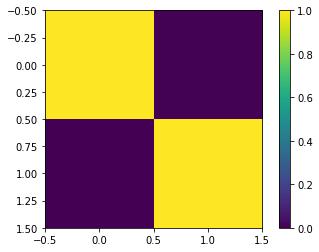

In [132]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [133]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs',\
                                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

In [134]:
yhat = logreg.predict(X_test)
acc1 = np.mean(yhat == y_test)
acc1

0.9959239130434783

In [135]:
C1 = confusion_matrix(y_test,yhat_ts)

print(np.array_str(C1, precision=3, suppress_small=True))


[[569   1]
 [  0 166]]


In [136]:
X_multi=np.array([final_file_0[3],final_file_0[2]])
X_multi=X_multi.T

y_multi = final_file_0[4]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)
ym_train=ym_train.astype('int')
ym_test=ym_test.astype('int')


In [137]:
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')

In [138]:
clf.fit(Xm_train, ym_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [139]:
ymhat = clf.predict(Xm_test)
acc1 = np.mean(ymhat == ym_test)
acc1

0.9945820433436533

[[[0.997 0.003 0.    0.    0.   ]
  [0.017 0.975 0.008 0.    0.   ]
  [0.    0.019 0.971 0.01  0.   ]
  [0.    0.    0.2   0.8   0.   ]
  [0.    0.    0.    0.    1.   ]]]


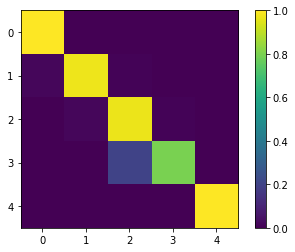

In [140]:
C2 = confusion_matrix(ym_test,ymhat)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()